<a href="https://colab.research.google.com/github/SBSATHISHKUMAR/Capstone-Project/blob/main/Analysing_Startups_and_Profit_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About Dataset**

India is a global hub and there are many startups that are emerging as unicorn and competing against the world in various platforms and domains.
India registers almost 10000+ private limited every month apart from Sole proprietorship or LLP or Foreign companies with Ministry of Corporate Affairs.

Analysing on these data on Location of registration and types of business gives you the trend where the industry is heading towards.
This is always a curious point for me to see where the future is!!!

The Dataset contains the list of companies registered with MCA across India in 2021.

The data is anonymised and unique id is generated for the companies registered.

**Startup India - Exploratory Data Analysis**

1- The dataset contains updated record of all startups in 2021.



2- An Exploratory Data Analysis is performed our the record with different types of data visualizations.

**Exploratory Data Analysis (EDA)**

It is an approach to analyze the data using visual techniques.

It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations. 

**Mounting the drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**let’s start analyzing Indian StartUps by importing the necessary Python libraries and the dataset :**



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Analysing Startups and Profit Prediction - Capstone Project​/Analysing Indian Startups in 2021.csv")

In [4]:
data.dtypes

company_uid             object
date_of_registration    object
month_name              object
state                   object
roc                     object
category                object
class                   object
company_type            object
authorized_capital       int64
paidup_capital           int64
activity_code            int64
activity_description    object
dtype: object

**Checking Duplicates**

In [5]:
data.duplicated()
print('There are',data.duplicated().sum(),'duplicate values in the dateset.')

There are 0 duplicate values in the dateset.


**Display top 5 records**

In [6]:
 data.head()

,company_uid,date_of_registration,month_name,state,roc,category,class,company_type,authorized_capital,paidup_capital,activity_code,activity_description
0,b928b473-d6d6-4b92-a63d-d262bf30c24b,19-01-2021,Jan-21,Telangana,RoC-Hyderabad,Company limited by Shares,Private,Non-govt company,1500000,102000,45309,Construction
1,9696190f-7478-4d61-81f1-fc4eb08cce13,25-01-2021,Jan-21,Tamil Nadu,RoC-Chennai,Company limited by Shares,Private,Non-govt company,100000,3000,74994,Business Services
2,59de4ca1-c15f-4d6d-8de3-03319793c884,14-01-2021,Jan-21,Maharashtra,RoC-Pune,Company limited by Shares,Public,Non-govt company,500000,500000,65990,Finance
3,e28b4caa-b7f9-4faf-8bbe-b12028177417,25-01-2021,Jan-21,Telangana,RoC-Hyderabad,Company limited by Shares,Private,Non-govt company,1000000,10000,72900,Business Services
4,e1861c6f-c2a0-4a89-81e9-b39f11b1b6c6,19-01-2021,Jan-21,Jammu & Kashmir,RoC-Jammu,Company limited by Shares,Private,Non-govt company,500000,500000,72900,Business Services


In [7]:
data.shape

(54894, 12)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54894 entries, 0 to 54893
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   company_uid           54894 non-null  object
 1   date_of_registration  54894 non-null  object
 2   month_name            54894 non-null  object
 3   state                 54894 non-null  object
 4   roc                   54894 non-null  object
 5   category              54894 non-null  object
 6   class                 54894 non-null  object
 7   company_type          54894 non-null  object
 8   authorized_capital    54894 non-null  int64 
 9   paidup_capital        54894 non-null  int64 
 10  activity_code         54894 non-null  int64 
 11  activity_description  54894 non-null  object
dtypes: int64(3), object(9)
memory usage: 5.0+ MB


In [9]:
data.describe()

,authorized_capital,paidup_capital,activity_code
count,5.489400e+04,5.489400e+04,54894.000000
mean,1.617091e+06,5.860709e+05,52940.032718
std,5.226937e+07,1.725209e+07,26188.280366
min,0.000000e+00,0.000000e+00,1100.000000
25%,1.000000e+05,1.000000e+05,29308.000000
50%,5.000000e+05,1.000000e+05,60221.000000
75%,1.000000e+06,1.000000e+05,74300.000000
max,1.000000e+10,2.600000e+09,99000.000000


**data frame with categorical features**

In [10]:
data.describe(include='object')

,company_uid,date_of_registration,month_name,state,roc,category,class,company_type,activity_description
count,54894,54894,54894,54894,54894,54894,54894,54894,54894
unique,54894,99,4,71,26,2,3,5,20
top,b928b473-d6d6-4b92-a63d-d262bf30c24b,08-02-2021,Mar-21,Maharashtra,RoC-Delhi,Company limited by Shares,Private,Non-govt company,Business Services
freq,1,926,17324,7442,8154,54559,50457,54389,14805


**Converting float fields into Integer**

In [11]:
data['authorized_capital'] = data['authorized_capital'].astype('int')
data['paidup_capital'] = data['paidup_capital'].astype('int')
data['activity_code'] = data['activity_code'].astype('int')

In [12]:
data[["authorized_capital","paidup_capital","activity_code"]] = data[["authorized_capital","paidup_capital","activity_code"]].astype("int32")

In [13]:
data[["authorized_capital","paidup_capital","activity_code"]][0:10]

,authorized_capital,paidup_capital,activity_code
0,1500000,102000,45309
1,100000,3000,74994
2,500000,500000,65990
3,1000000,10000,72900
4,500000,500000,72900
5,100000,100000,72900
6,100000,100000,72900
7,500000,100000,45202
8,500000,100000,26990
9,500000,100000,22219


**Check For Null**

In [14]:
data.isnull().sum()

company_uid             0
date_of_registration    0
month_name              0
state                   0
roc                     0
category                0
class                   0
company_type            0
authorized_capital      0
paidup_capital          0
activity_code           0
activity_description    0
dtype: int64

In [15]:
for col in data.columns:
    print(col)

company_uid
date_of_registration
month_name
state
roc
category
class
company_type
authorized_capital
paidup_capital
activity_code
activity_description


**Column Date_of_registration**

In [16]:
Data = data["date_of_registration"].str[0:2].value_counts()
Data = Data.sort_index()
Dates = Data.keys()
Reg = Data.tolist()

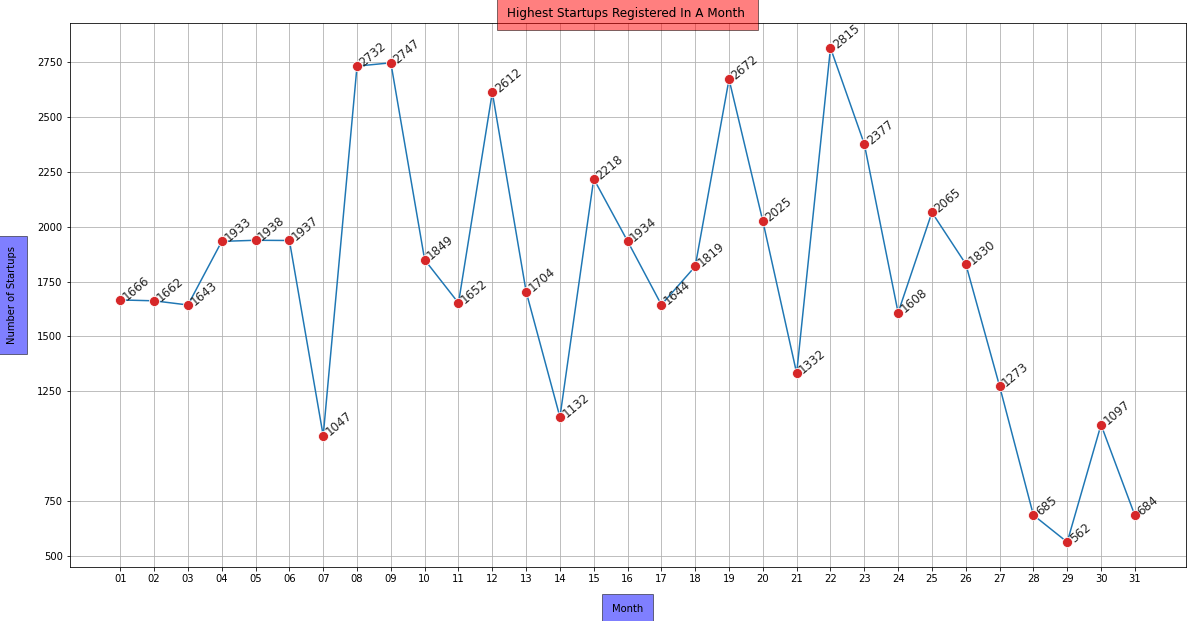

In [17]:
plt.figure(figsize=(20,10))
plt.grid()
plt.yticks([250,500,750,100,1250,1500,1750,2000,2250,2500,2750,3000])
plt.xlabel("Month", bbox={"facecolor":"blue", "alpha":0.5, "pad":10}, labelpad=20)
plt.ylabel("Number of Startups", bbox={"facecolor":"blue", "alpha":0.5, "pad":10}, labelpad=20)
plt.title("Highest Startups Registered In A Month ", bbox={"facecolor":"red", "alpha":0.5, "pad":10})

sns.set_theme(style="dark")
sns.lineplot(x=Dates,y=Reg, marker="o", markersize = 10,markerfacecolor="tab:red")

for index,value in enumerate(Reg):
    plt.text(index,value,str(value),rotation=40)
    
plt.show()

**Since date_of_registeration and activity_code is of no use to our EDA we drop that column**

In [18]:
data = data.drop(['date_of_registration','activity_code'], axis = 1) 

**Lets find out number of Companies registered in every month**

In [19]:
index = data.month_name.value_counts().keys().tolist()
counts = data.month_name.value_counts().tolist()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


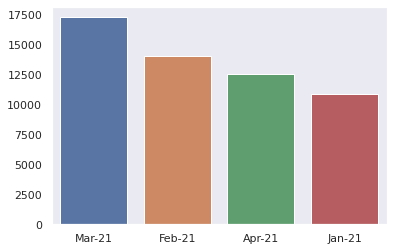

In [20]:
sns.barplot(index,counts)
plt.show()

**Monthly registraion distribution**

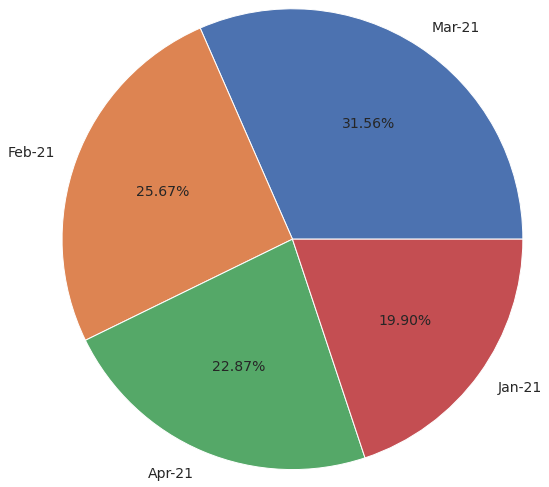

In [21]:
month_name_dict = dict(data.month_name.value_counts())

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.pie(x=list(month_name_dict.values()), 
       labels=list(month_name_dict.keys()), 
       autopct="%1.2f%%",
       radius=2,
       textprops={'fontsize': 14})
plt.show()

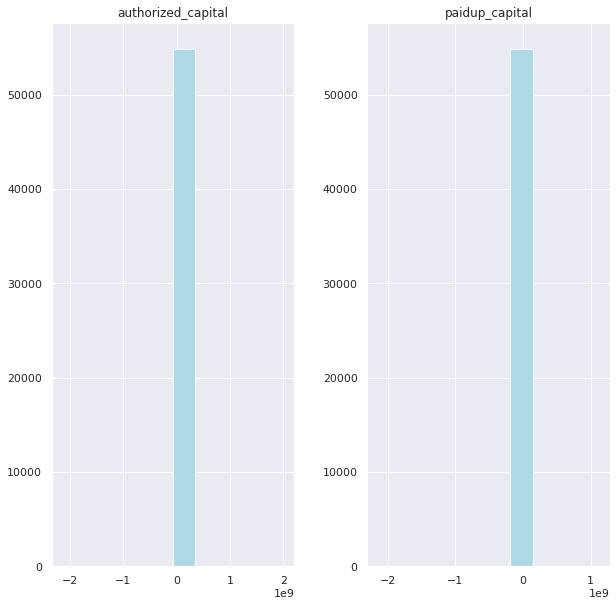

In [22]:
import matplotlib.pyplot as plt
fig=data.hist(figsize=(10,10),color='lightblue')
plt.show()

**State wise registration distribution**

In [23]:
state_dict = {}
others = 0

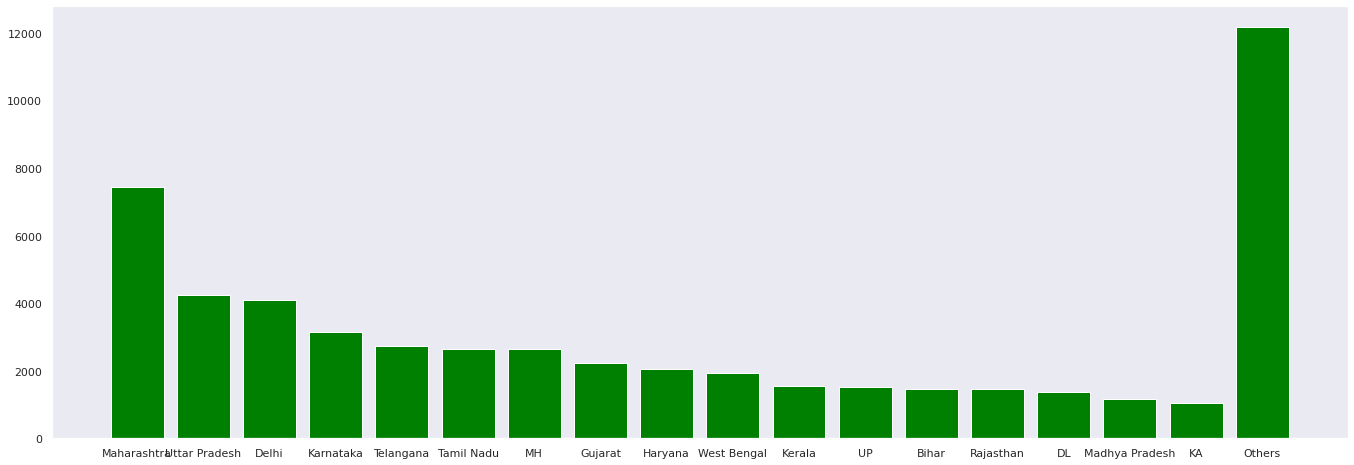

In [24]:
for key, value in dict(data.state.value_counts()).items():
    if value > 1000:
        state_dict[key] = value
    else:
        others += value
state_dict["Others"] = others

fig = plt.figure(figsize=(18, 6))
ax = fig.add_axes([0,0,1,1])
ax.bar(x=list(state_dict.keys()), height=list(state_dict.values()), color="green")
plt.show()

**Companies in each Sector**

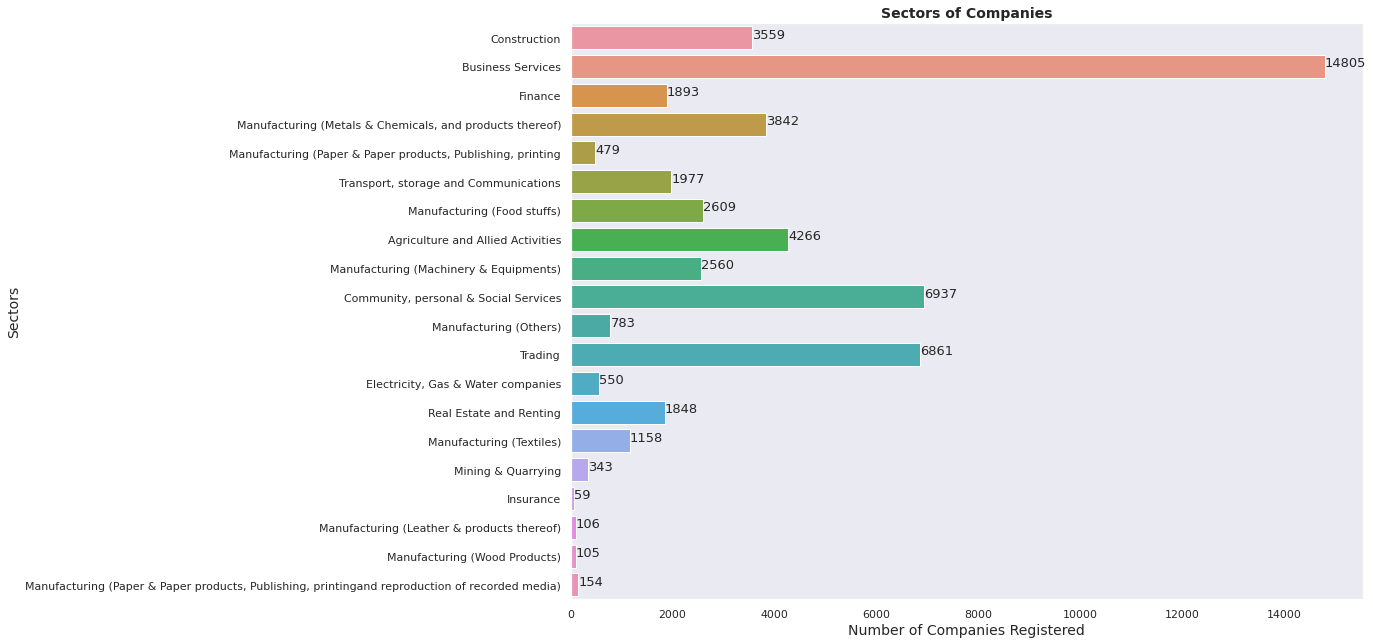

In [25]:
ax=plt.figure(figsize=(11,8)).add_axes([0,0,1,1])
sns.set_style('white')
sns.countplot(y='activity_description',data=data)
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,
             "%i"% rect.get_width(),fontsize=13 )
    
    plt.title('Sectors of Companies',fontsize=14, weight='bold')
plt.xlabel('Number of Companies Registered',fontsize=14)
plt.ylabel('Sectors',fontsize=14)
plt.show()

**We see that march of 21 had the most number of companies registered. And starting month of the year had the least.**

In [26]:
data.state.unique()

array(['Telangana', 'Tamil Nadu', 'Maharashtra', 'Jammu & Kashmir',
       'Karnataka', 'Uttar Pradesh', 'Delhi', 'Madhya Pradesh', 'Gujarat',
       'Orissa', 'Rajasthan', 'Jharkhand', 'Bihar', 'Haryana', 'Kerala',
       'Uttarakhand', 'West Bengal', 'Andhra Pradesh', 'Goa',
       'Chattisgarh', 'Nagaland', 'Daman and Diu', 'Himachal Pradesh',
       'Assam', 'Punjab', 'Chandigarh', 'Dadra & Nagar Haveli', 'Manipur',
       'Andaman & Nicobar', 'Pondicherry', 'Tripura', 'Meghalaya',
       'Lakshadweep', 'MH', 'TG', 'GJ', 'CH', 'DL', 'HR', 'UP', 'RJ',
       'CT', 'KL', 'WB', 'KA', 'MP', 'PB', 'BR', 'MN', 'TN', 'OR', 'HP',
       'UR', 'JH', 'AP', 'GA', 'AS', 'DN', 'TR', 'JK', 'PY', 'MZ', 'NL',
       'AN', 'AR', 'LD', 'ML', 'LH', 'Arunachal Pradesh', 'Mizoram',
       'Ladakh'], dtype=object)

**Lets clean the state column**

In [27]:
state_code ={'MH':  'Maharashtra'
,'TG': 'Telangana'
,'GJ': 'Gujarat'
,'CH': 'Chandigarh'
,'DL': 'Delhi'
,'HR': 'Haryana'
,'UP': 'Uttar Pradesh'
,'RJ': 'Rajasthan'
,'CT': 'Chattisgarh'
,'KL': 'Kerala'
,'WB': 'West Bengal'
,'KA': 'Karnataka'
,'MP': 'Madhya Pradesh'
,'PB': 'Punjab'
,'BR': 'Bihar'
,'MN': 'Manipur'
,'TN': 'Tamil Nadu'
,'OR': 'Orissa'
,'HP': 'Himachal Pradesh'
,'UR': 'Uttarakhand'
,'JH': 'Jharkhand'
,'AP': 'Andhra Pradesh'
,'GA': 'Goa'
,'AS': 'Assam'
,'DN': 'Dadra & Nagar Haveli'
,'TR': 'Tripura'
,'JK': 'Jammu & Kashmir'
,'PY': 'Pondicherry'
,'MZ': 'Mizoram'
,'NL': 'Nagaland'
,'AN': 'Andaman & Nicobar'
,'AR': 'Arunachal Pradesh'
,'LD': 'Lakshadweep'
,'ML': 'Meghalaya'
,'LH': 'Jammu & Kashmir'
,'DD': 'Daman and Diu'
     }

In [28]:
data.replace({"state": state_code},inplace=True)

In [29]:
data.state.unique()

array(['Telangana', 'Tamil Nadu', 'Maharashtra', 'Jammu & Kashmir',
       'Karnataka', 'Uttar Pradesh', 'Delhi', 'Madhya Pradesh', 'Gujarat',
       'Orissa', 'Rajasthan', 'Jharkhand', 'Bihar', 'Haryana', 'Kerala',
       'Uttarakhand', 'West Bengal', 'Andhra Pradesh', 'Goa',
       'Chattisgarh', 'Nagaland', 'Daman and Diu', 'Himachal Pradesh',
       'Assam', 'Punjab', 'Chandigarh', 'Dadra & Nagar Haveli', 'Manipur',
       'Andaman & Nicobar', 'Pondicherry', 'Tripura', 'Meghalaya',
       'Lakshadweep', 'Mizoram', 'Arunachal Pradesh', 'Ladakh'],
      dtype=object)

**Lets check it out which state had the most company registered.**

In [30]:
index = data.state.value_counts().keys().tolist()
counts = data.state.value_counts().tolist() 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


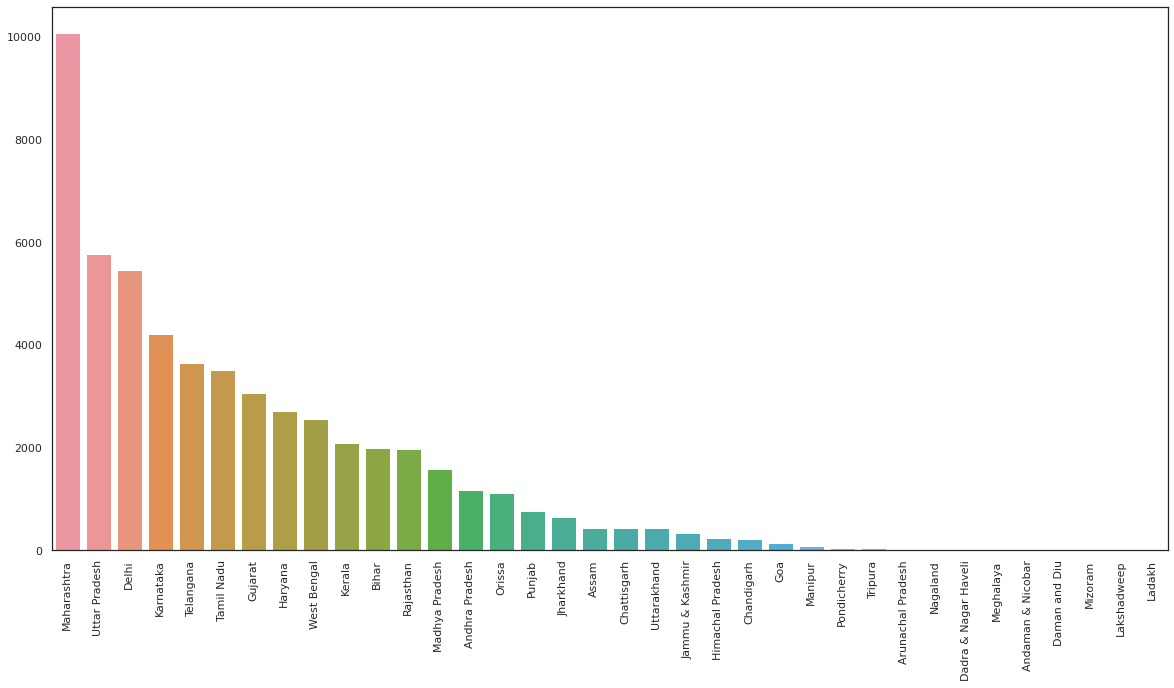

In [31]:
plt.figure(figsize= (20,10))

sns.barplot(index,counts)
plt.xticks(rotation = 90)
plt.show()

**Maharashtra has the largest number of companies registered.
Looking at the figure it looks like the last 5-6 states didnt had any companies registered
Lets take a closer look.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


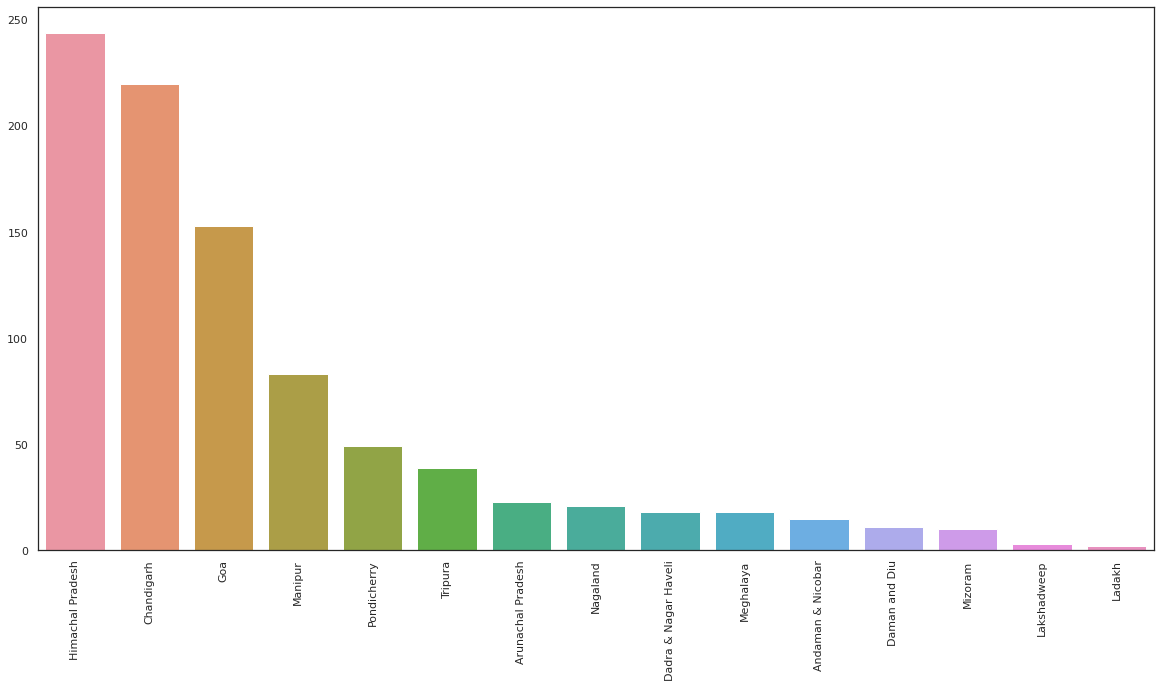

In [32]:
plt.figure(figsize= (20,10))

sns.barplot(index[-15:],counts[-15:])
plt.xticks(rotation = 90)
plt.show()

**Number of companies registered in each state in month of Jan**

In [33]:
registered_jan = data[data['month_name'] == 'Jan-21'].groupby(['state']).count()
state_index = registered_jan.index.tolist()
count_jan = registered_jan['company_uid'].tolist()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


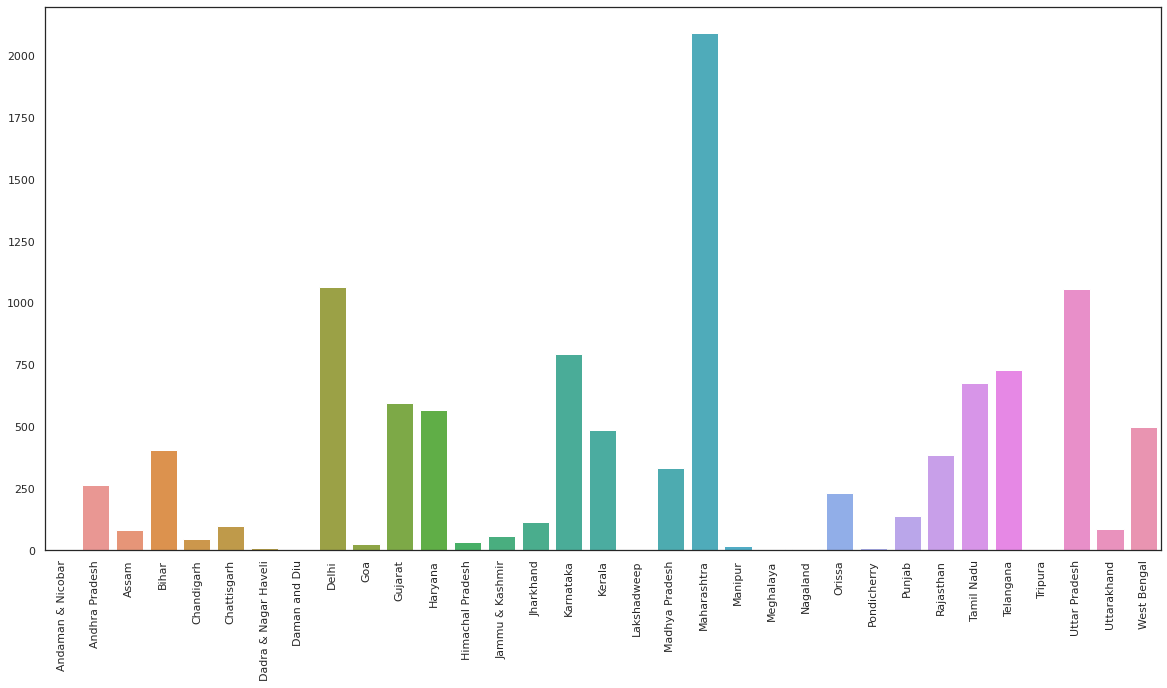

In [34]:
plt.figure(figsize= (20,10))

sns.barplot(state_index,count_jan)
plt.xticks(rotation = 90)
plt.show()

**Number of comapnies registered in each state in month of Feb**

In [35]:
registered_feb = data[data['month_name'] == 'Feb-21'].groupby(['state']).count()
state_index = registered_feb.index.tolist()
count_feb= registered_feb['company_uid'].tolist()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


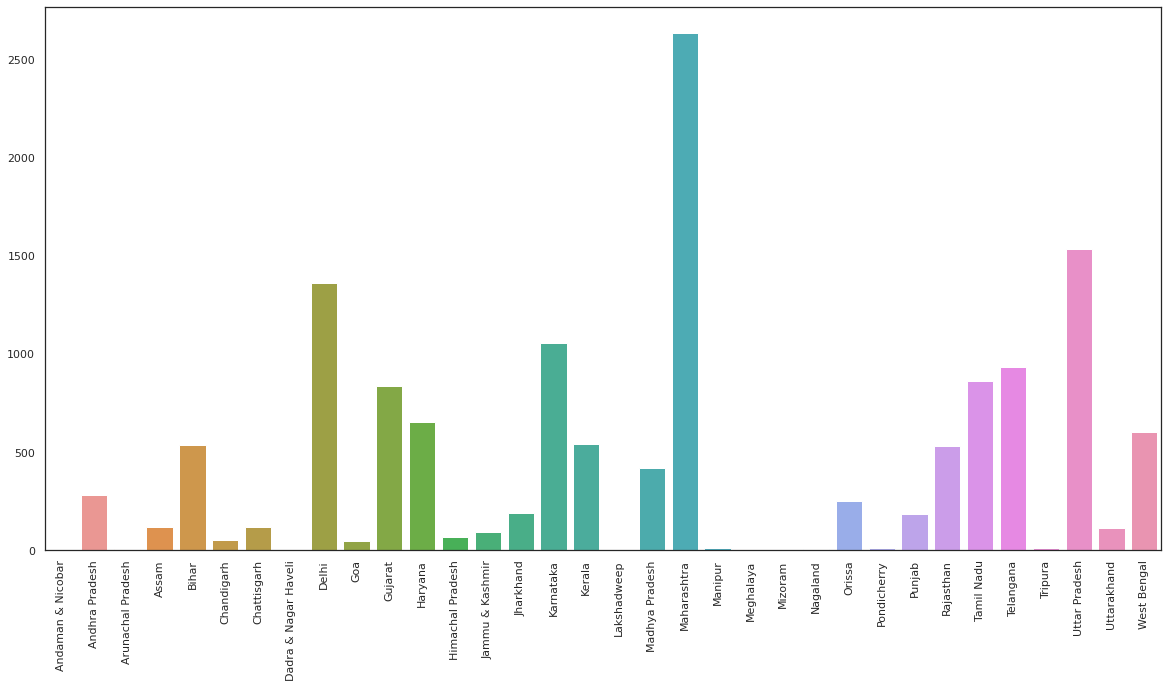

In [36]:
plt.figure(figsize= (20,10))

sns.barplot(state_index,count_feb)
plt.xticks(rotation = 90)
plt.show()

**Number of comapnies registered in each state in month of March**

In [37]:
registered_march = data[data['month_name'] == 'Mar-21'].groupby(['state']).count()
state_index = registered_march.index.tolist()
count_march = registered_march['company_uid'].tolist()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


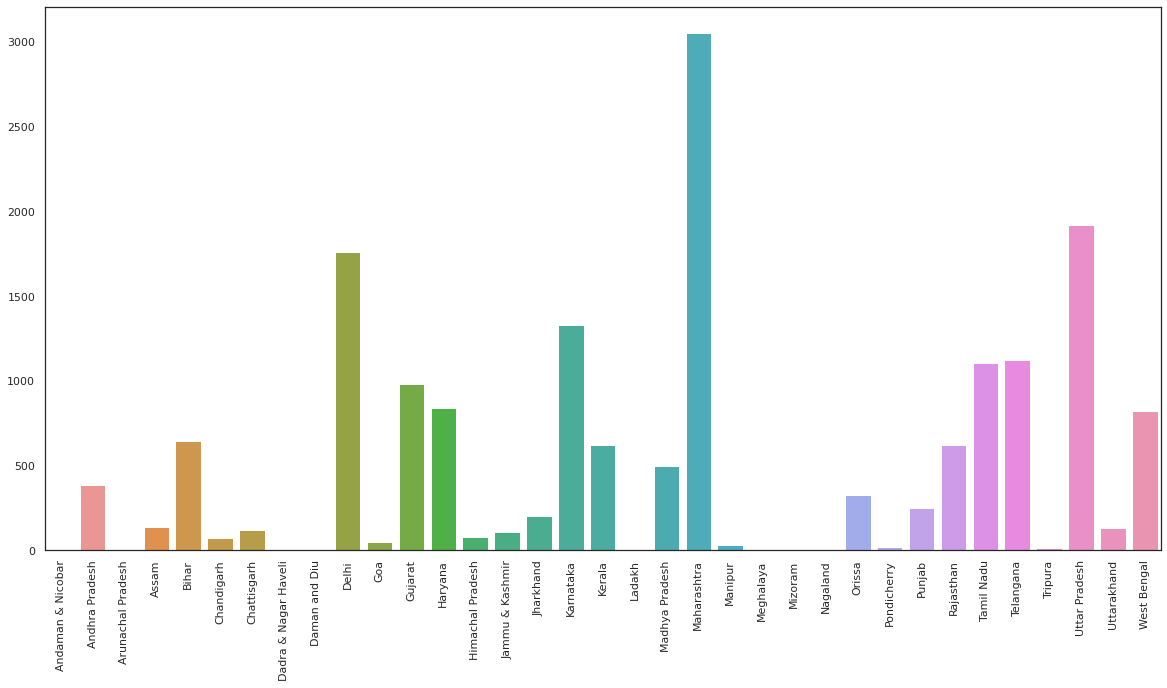

In [38]:
plt.figure(figsize= (20,10))

sns.barplot(state_index,count_march)
plt.xticks(rotation = 90)
plt.show()

**Number of comapnies registered in each state in month of April**

In [39]:
registered_april = data[data['month_name'] == 'Apr-21'].groupby(['state']).count()
state_index = registered_april.index.tolist()
count_apr = registered_april['company_uid'].tolist()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


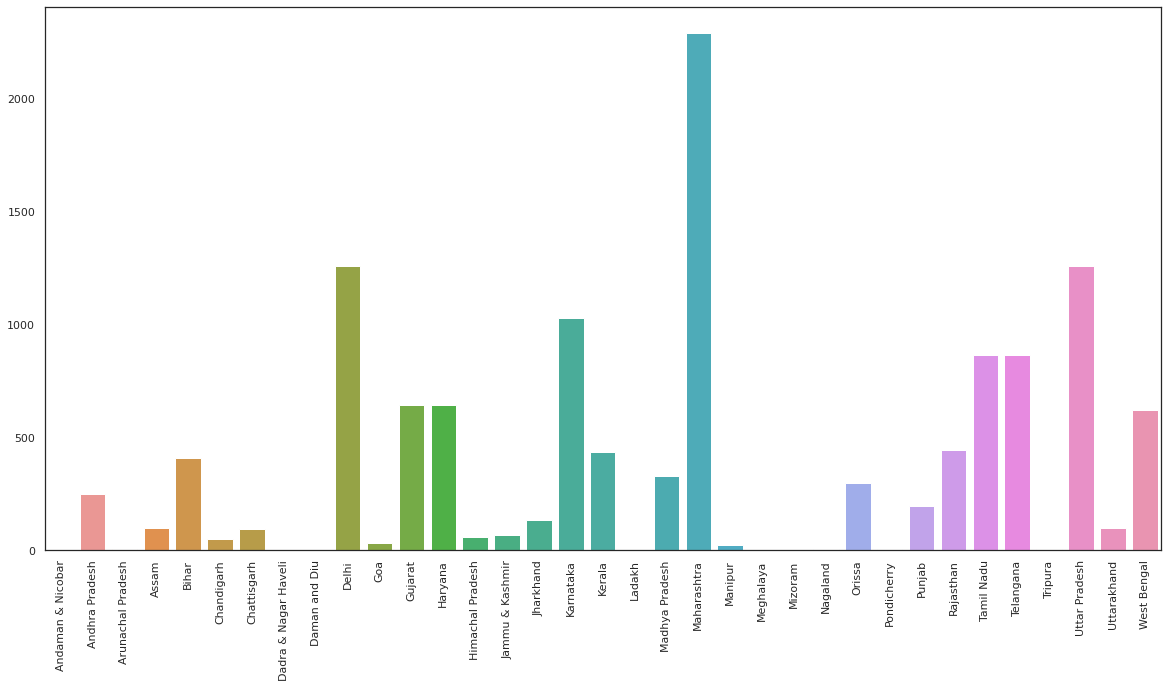

In [40]:
plt.figure(figsize= (20,10))

sns.barplot(state_index,count_apr)
plt.xticks(rotation = 90)
plt.show()

**Lets find out Categories of company**

In [41]:
data.category.unique()

array(['Company limited by Shares', 'Company Limited by Guarantee'],
      dtype=object)

In [42]:
category = data.category.value_counts().keys().tolist()
counts = data.category.value_counts().tolist() 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


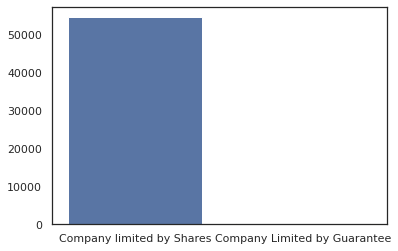

In [43]:
sns.barplot(category,counts)
plt.show()

**there are very less Comapany Limited by Guarantee Lets see which state they are located in :**

In [44]:
states_clg = data[data['category'] == 'Company Limited by Guarantee'].groupby(['state']).count()
states_clg.index.tolist()

['Andhra Pradesh',
 'Assam',
 'Bihar',
 'Chandigarh',
 'Chattisgarh',
 'Delhi',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu & Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Orissa',
 'Pondicherry',
 'Punjab',
 'Rajasthan',
 'Tamil Nadu',
 'Telangana',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal']

**check out class of companies**

In [45]:
data['class'].unique()

array(['Private', 'Public', 'Private(One Person Company)'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


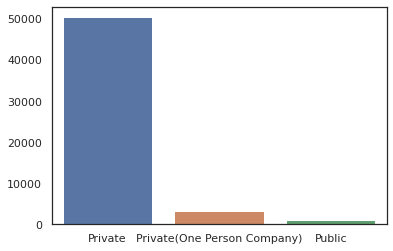

In [46]:
company_class = data['class'].value_counts().keys().tolist()
counts = data['class'].value_counts().tolist()
sns.barplot(company_class,counts)
plt.show()

**Very less Public class companies were registered**

In [47]:
data['company_type'].value_counts()

Non-govt company                  54389
Subsidiary of Foreign Company       430
Guarantee and Association comp       50
State Govt company                   19
Union Govt company                    6
Name: company_type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


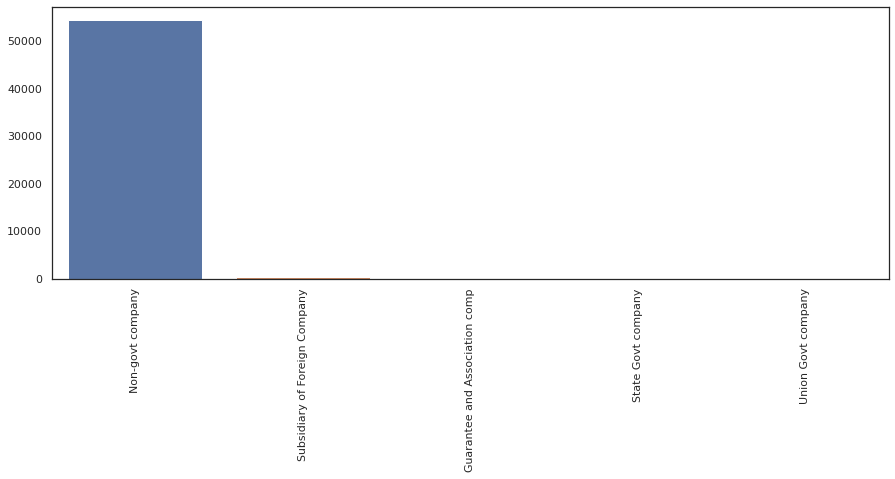

In [48]:
company_type = data['company_type'].value_counts().keys().tolist()
counts = data['company_type'].value_counts().tolist()

plt.figure(figsize = (15,5))
sns.barplot(company_type,counts)
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


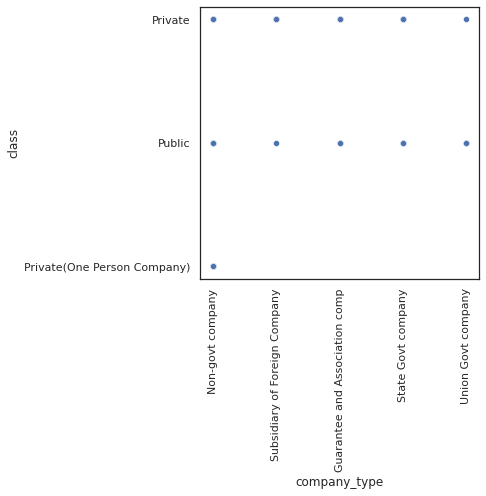

In [49]:
plt.figure(figsize = (5,5))
sns.scatterplot(data['company_type'],data['class'])
plt.xticks(rotation = 90)
plt.show()

**The concept of Authorized Capital and Paid Up capital**

**Authorized Capital -> It is the maximum amount of shares a company can issue.**

**Paid Up Capital -> It is the acutal amount of shares that the company has issued to its shareholders**

In [50]:
data['authorized_capital'].min()

-2138612296

In [51]:
no_authorized_capital = data[data['authorized_capital'] == 0]
no_authorized_capital

,company_uid,month_name,state,roc,category,class,company_type,authorized_capital,paidup_capital,activity_description
231,b81f7626-b272-441c-ba48-5e1f772dc718,Jan-21,Maharashtra,RoC-Mumbai,Company Limited by Guarantee,Private,Non-govt company,0,0,"Community, personal & Social Services"
305,afb8f7c4-5b86-434a-a0c9-d13b8f0ad372,Jan-21,Gujarat,RoC-Ahmedabad,Company Limited by Guarantee,Private,Non-govt company,0,0,"Community, personal & Social Services"
470,efff5d48-24cb-4fa9-ba12-f8c5ef9c73d0,Jan-21,Karnataka,RoC-Bangalore,Company Limited by Guarantee,Private,Non-govt company,0,0,"Community, personal & Social Services"
598,de09fa35-b196-4a52-aa25-9267c7b95d5f,Jan-21,West Bengal,RoC-Kolkata,Company Limited by Guarantee,Private,Non-govt company,0,0,"Community, personal & Social Services"
610,b4d89859-1096-4798-9840-6cf849a6953f,Jan-21,Maharashtra,RoC-Mumbai,Company Limited by Guarantee,Private,Guarantee and Association comp,0,0,"Community, personal & Social Services"
...,...,...,...,...,...,...,...,...,...,...
54318,aea98908-6b97-49fb-9d08-af6c1a17610d,Apr-21,Uttarakhand,RoC-Uttarakhand,Company Limited by Guarantee,Private,Non-govt company,0,0,"Community, personal & Social Services"
54597,01d38677-aeba-43f8-b98d-c0de960c549c,Apr-21,Delhi,RoC-Delhi,Company Limited by Guarantee,Private,Non-govt company,0,0,"Community, personal & Social Services"
54599,1bce10eb-4f15-44a6-b94a-63e930ae2d9c,Apr-21,Uttarakhand,RoC-Uttarakhand,Company Limited by Guarantee,Public,Non-govt company,0,0,"Community, personal & Social Services"
54814,cbb526c1-4046-4258-93b6-66e3c91c71f5,Apr-21,Gujarat,RoC-Ahmedabad,Company Limited by Guarantee,Private,Non-govt company,0,0,"Community, personal & Social Services"


In [52]:
new_data = data[data['authorized_capital'] < data['paidup_capital'] ]
new_data

,company_uid,month_name,state,roc,category,class,company_type,authorized_capital,paidup_capital,activity_description
13902,d6f8a0d1-c650-4e46-97df-b40149f84120,Feb-21,Maharashtra,RoC-Mumbai,Company limited by Shares,Private,Non-govt company,100000,500000,Agriculture and Allied Activities
14138,5ad7a168-5cca-4e5d-9936-f906b1a440fe,Feb-21,Uttar Pradesh,RoC-Kanpur,Company limited by Shares,Private,Non-govt company,100000,1000000,"Community, personal & Social Services"
21553,ca2b38fd-458c-4315-a786-125016146249,Feb-21,Maharashtra,RoC-Mumbai,Company limited by Shares,Private,Non-govt company,50000,100000,Agriculture and Allied Activities
30484,f4a7f623-dd90-4d0b-99b7-f9dc28402c3c,Mar-21,Uttar Pradesh,RoC-Kanpur,Company limited by Shares,Private,Non-govt company,1000000,1500000,Construction
54890,7d744075-e78f-45d0-9b9b-eaaf2b17a4d8,Apr-21,Delhi,RoC-Delhi,Company limited by Shares,Private,Non-govt company,500000,1589455,Business Services
54891,336796bb-6f67-4f4f-906e-f01605814266,Apr-21,Maharashtra,RoC-Pune,Company limited by Shares,Private,Non-govt company,500000,1589455,Manufacturing (Wood Products)
54892,e248cdb7-39a9-4b11-b7ff-b967f887cce0,Apr-21,Haryana,RoC-Delhi,Company limited by Shares,Private,Non-govt company,500000,1589455,Manufacturing (Machinery & Equipments)
54893,53e5ee51-be3d-4acf-a3fc-e55f4b127aab,Apr-21,Delhi,RoC-Delhi,Company limited by Shares,Private,Non-govt company,500000,1589455,Manufacturing (Leather & products thereof)


**Comparision of Companies on the basis of Authorized and Paid-up capital**

In [53]:
data_activity=data.pivot_table(index='activity_description',values=['paidup_capital','authorized_capital'])
data_activity.reset_index(inplace=True)

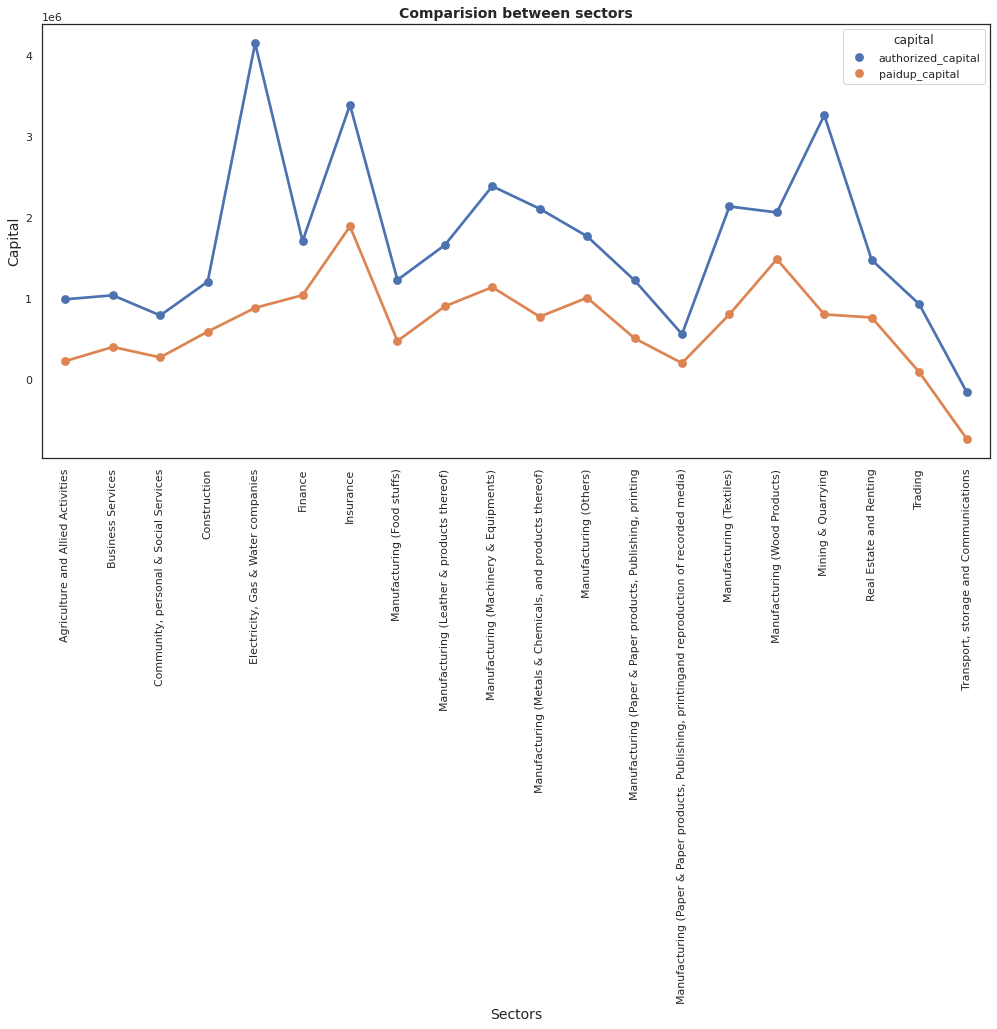

In [54]:
plt.figure(figsize=(17,8))
df = data_activity.melt('activity_description', var_name='capital',  value_name='vals')
sns.pointplot(x="activity_description", y="vals", hue='capital', data=df)
plt.xticks(rotation = 90)
plt.title('Comparision between sectors',fontsize=14, weight='bold')
plt.xlabel('Sectors',fontsize=14)
plt.ylabel('Capital',fontsize=14)
plt.show()

**Usually paidup Capital can never be more than the authorised capital, this can be some error entries in the data**

**Coverting each state in to its coresspinding zones and visulaizing distribution of companies in each zone**

In [55]:
east_zone = ['Orissa','Jharkhand','Bihar','West Bengal']
northeast_zone = ['Nagaland','Assam','Manipur','Tripura','Meghalaya','Mizoram','Arunachal Pradesh']
central_zone = ['Madhya Pradesh','Chattisgarh']
west_zone =['Maharashtra','Gujarat','Rajasthan','Daman and Diu','Dadra & Nagar Haveli']
south_zone = ['Telangana', 'Tamil Nadu','Karnataka','Kerala','Andhra Pradesh','Goa','Andaman & Nicobar', 'Pondicherry','Lakshadweep']
north_zone = ['Jammu & Kashmir','Uttar Pradesh','Delhi','Haryana','Uttarakhand','Himachal Pradesh','Punjab', 'Chandigarh','Ladakh']

In [56]:
east  = 0
northeast =0
central = 0
west = 0
south = 0
north = 0

def countRegions(states):
    global east,northeast,central,west,south,north
    for state in states:
        if(state in east_zone):
            east += 1 
        if(state in northeast_zone):
            northeast += 1
        if(state in central_zone):
            central += 1
        if(state in west_zone):
            west += 1
        if(state in south_zone):
            south += 1
        if(state in north_zone):
            north += 1
            
countRegions(data['state'])

In [57]:
zone = ['east','northeast','central','west','south','north']
zone_count = [east,northeast,central,west,south,north]

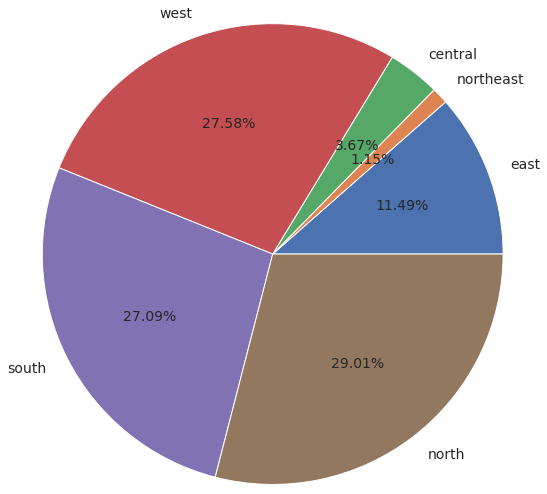

In [58]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.pie(x=list(zone_count), 
       labels=list(zone), 
       autopct="%1.2f%%",
       radius=2,
       textprops={'fontsize': 14})
plt.show()

**Even though Maharashtra has largest number of comapnies registered, we see that north region has most companies resgistered. This can be due to more industrial area in north region**

**Lets check number of roc_centers in each zone**



In [59]:
south_set = set()
west_set = set()
north_set= set()

for index, row in data.iterrows():
    if(row['state'] in south_zone and row['roc'] not in south_set):
        south_set.add(row['roc'])
    if(row['state'] in north_zone and row['roc'] not in north_set):
        north_set.add(row['roc'])
    if(row['state'] in west_zone and row['roc'] not in west_set):
        west_set.add(row['roc'])

In [60]:
print(south_set),print(north_set),print(west_set)

{'RoC-Andaman', 'RoC-Pondicherry', 'RoC-Coimbatore', 'RoC-Goa', 'RoC-Ernakulam', 'RoC-Hyderabad', 'RoC-Vijayawada', 'RoC-Bangalore', 'RoC-Chennai'}
{'RoC-Jammu', 'RoC-Chandigarh', 'RoC-Uttarakhand', 'RoC-Kanpur', 'RoC-HimachalPradesh', 'RoC-Delhi'}
{'RoC-Mumbai', 'RoC-Pune', 'RoC-Goa', 'RoC-Ahmedabad', 'RoC-Jaipur'}


(None, None, None)

**Comparision of trends in top 5 states with national trends**

In [61]:
data5=data[(data['state'] == 'Maharashtra') |
                     (data['state'] == 'Uttar Pradesh') |
                     (data['state'] == 'Delhi') |
                     (data['state'] == 'Karnataka') |
                     (data['state'] == 'Telangana')
                    ]

In [62]:
data5_sector=pd.DataFrame(data5['activity_description'].groupby
                              (data5['activity_description'].iloc[:]).count())
data5_sector.rename(columns={"activity_description":"count"},inplace=True)
data5_sector.sort_values('count',ascending=False,inplace=True)
data5_sector.loc['Others'] = [ data5_sector.iloc[5:,0].sum()] 
data5_sector.sort_values('count',ascending=False,inplace=True)
data5_sector=data5_sector.iloc[:6,0]

<Figure size 6000x4000 with 0 Axes>

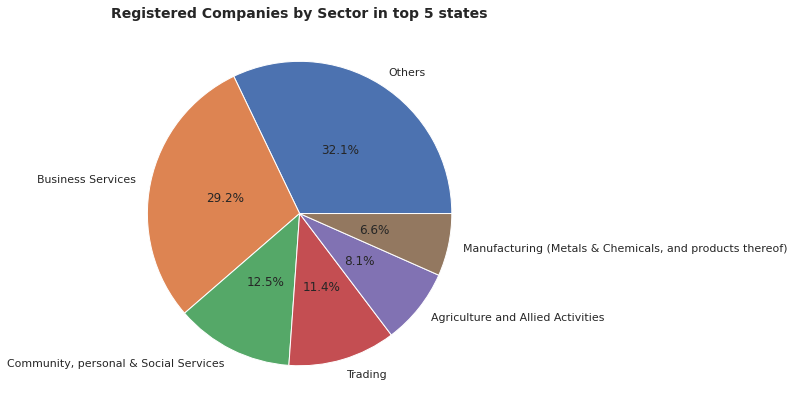

In [63]:
plt.figure(dpi=1000)

pie, ax = plt.subplots(figsize=[10,7])
labels = data5_sector.keys()
plt.pie(x=data5_sector, autopct="%.1f%%",labels=labels, pctdistance=0.5)
plt.title("Registered Companies by Sector in top 5 states", weight='bold',fontsize=14);
plt.show()

In [64]:
data5_activity=data5.pivot_table(index='activity_description',values=['paidup_capital','authorized_capital'])
data5_activity.reset_index(inplace=True)

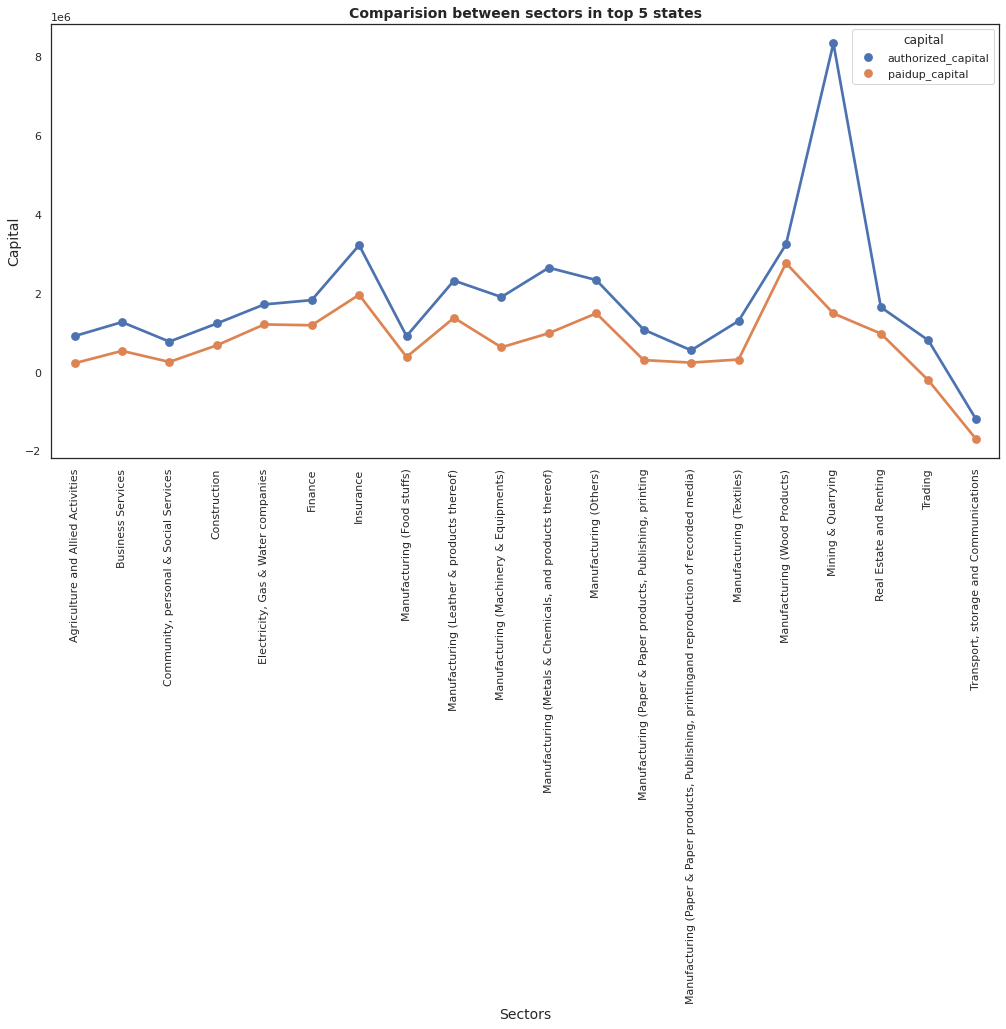

In [65]:
plt.figure(figsize=(17,8))
df = data5_activity.melt('activity_description', var_name='capital',  value_name='vals')
sns.pointplot(x="activity_description", y="vals", hue='capital', data=df)
plt.xticks(rotation = 90)
plt.title('Comparision between sectors in top 5 states',fontsize=14, weight='bold')
plt.xlabel('Sectors',fontsize=14)
plt.ylabel('Capital',fontsize=14)
plt.show()

**Companies registered in various RoC**

In [66]:
data_roc=pd.DataFrame(data['roc'].groupby
                              (data['roc'].iloc[:]).count())
data_roc.rename(columns={"roc":"count"},inplace=True)
data_roc.sort_values('count',ascending=False,inplace=True)
data_roc.reset_index(inplace=True)

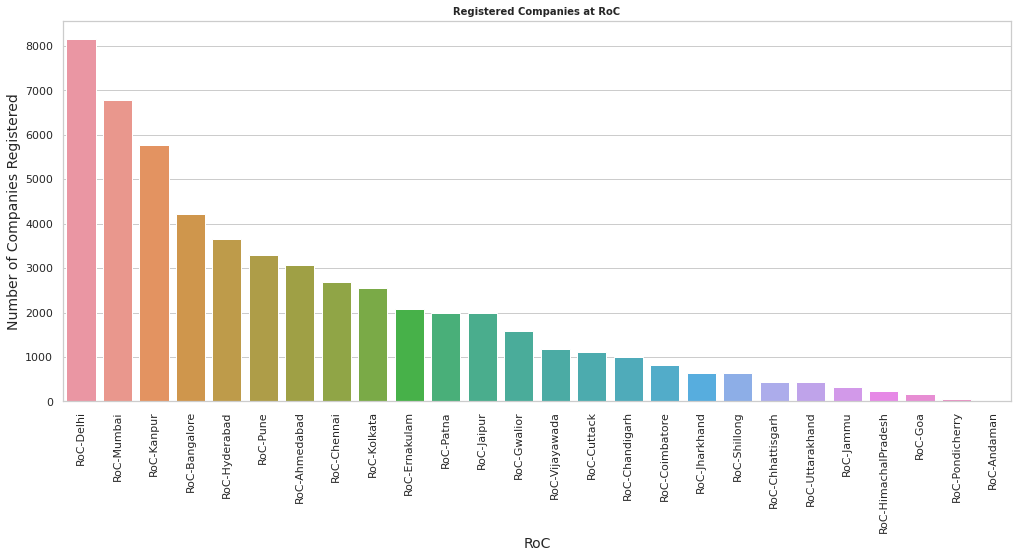

In [67]:
plt.figure(figsize=(17,7))
sns.set_style('whitegrid')

sns.barplot(x='roc',y='count',data=data_roc)

plt.xticks(rotation = 90)
plt.title('Registered Companies at RoC',fontsize=10, weight='bold')
plt.xlabel('RoC',fontsize=14)
plt.ylabel('Number of Companies Registered',fontsize=14)
plt.show()

**check activity wise distribution of Companies**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


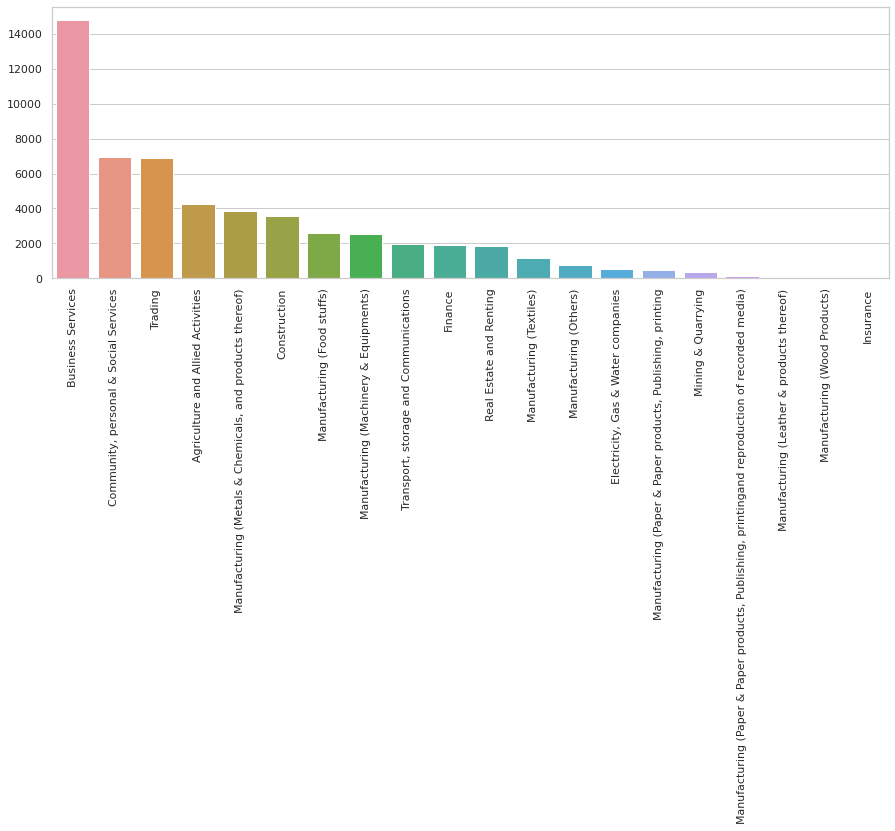

In [68]:
data['activity_description'].value_counts()
activity_description = data['activity_description'].value_counts().keys().tolist()
counts = data['activity_description'].value_counts().tolist()

plt.figure(figsize = (15,5))
sns.barplot(activity_description,counts)
plt.xticks(rotation = 90)
plt.show()

**RoC wise registration distribution**

In [69]:
roc_dict = {}
others = 0

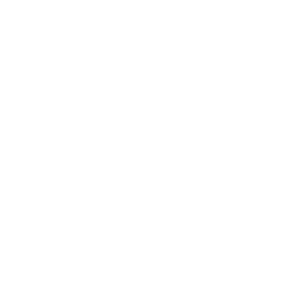

In [70]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.pie(x=list(roc_dict.values()), 
       labels=list(roc_dict.keys()), 
       autopct="%1.0f%%",
       radius=2,
       textprops={'fontsize': 14})
plt.show()

**Foreign Investments in India**

In [71]:
data_foreign=data[data['company_type']=='Subsidiary of Foreign Company']

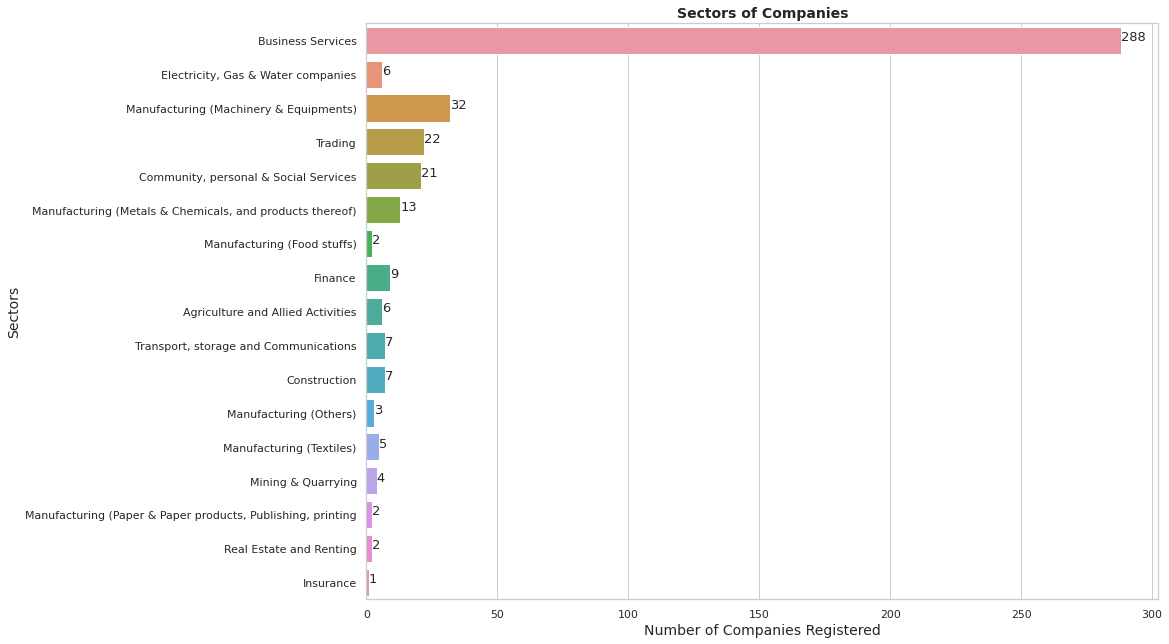

In [72]:
ax=plt.figure(figsize=(11,8)).add_axes([0,0,1,1])
sns.set_style('white')
sns.countplot(y='activity_description',data=data_foreign)
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,
             "%i"% rect.get_width(),fontsize=13 )

plt.title('Sectors of Companies',fontsize=14, weight='bold')
plt.xlabel('Number of Companies Registered',fontsize=14)
plt.ylabel('Sectors',fontsize=14)
plt.show()

**Capital Raised by Foreign Countries in India**

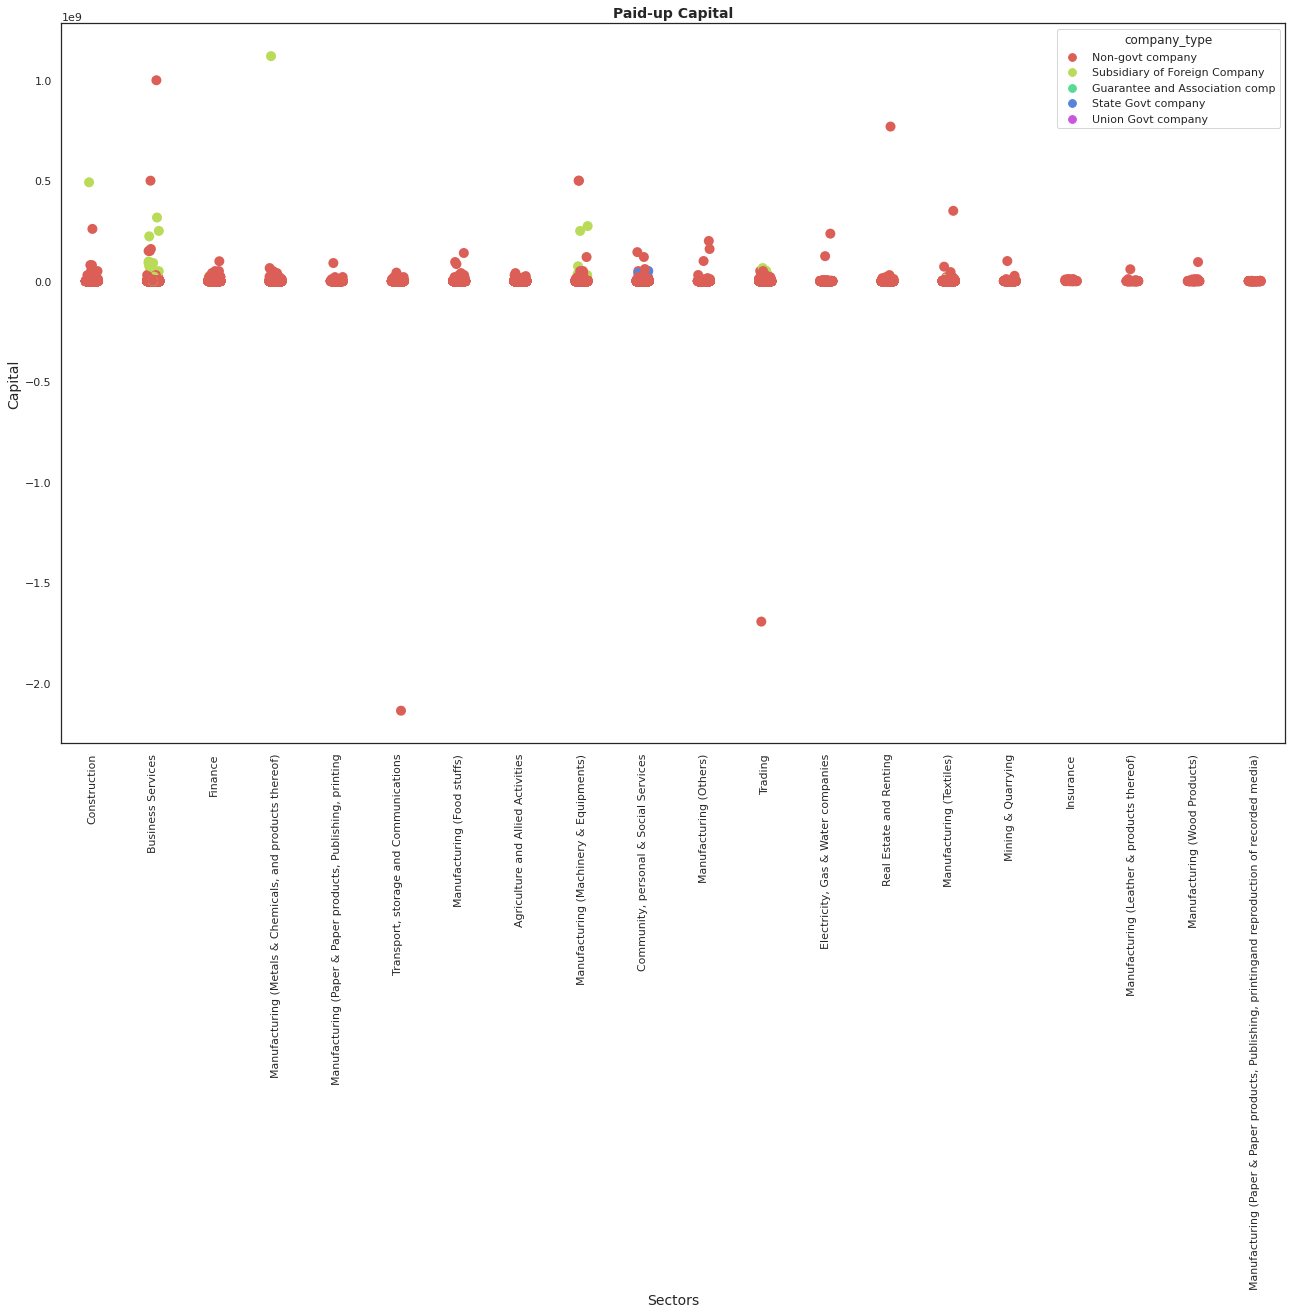

In [73]:
ax=plt.figure(figsize=(17,10)).add_axes([0,0,1,1])
sns.set_style('whitegrid')
sns.stripplot(x='activity_description',y='paidup_capital',data=data[data['paidup_capital']<1.5e9],
              jitter=True,hue='company_type',palette='hls',size=10)
plt.xticks(rotation = 90)
plt.title('Paid-up Capital',fontsize=14, weight='bold')
plt.xlabel('Sectors',fontsize=14)
plt.ylabel('Capital',fontsize=14)
plt.show()

In [74]:
fdata_activity=data_foreign.pivot_table(index='activity_description',
                                                  values=['paidup_capital','authorized_capital'])
fdata_activity.reset_index(inplace=True)

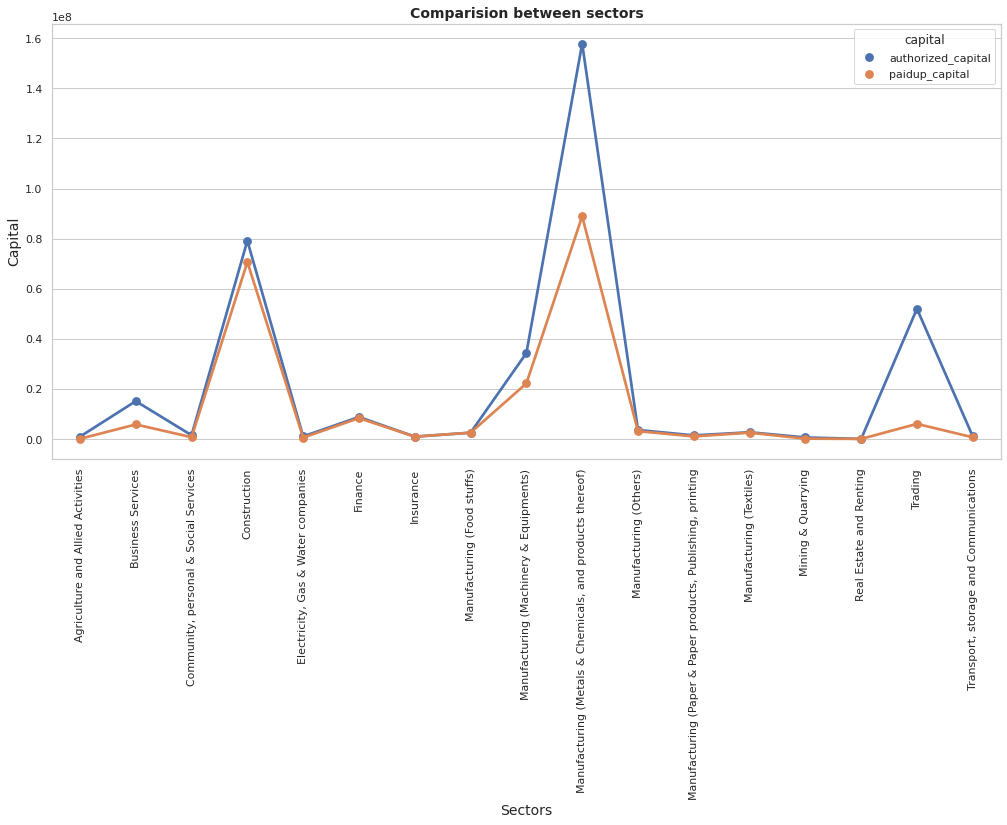

In [75]:
plt.figure(figsize=(17,8))
foreign = fdata_activity.melt('activity_description', var_name='capital',  value_name='vals')
sns.pointplot(x="activity_description", y="vals", hue='capital', data=foreign)
plt.xticks(rotation = 90)
plt.title('Comparision between sectors',fontsize=14, weight='bold')
plt.xlabel('Sectors',fontsize=14)
plt.ylabel('Capital',fontsize=14)
plt.show()

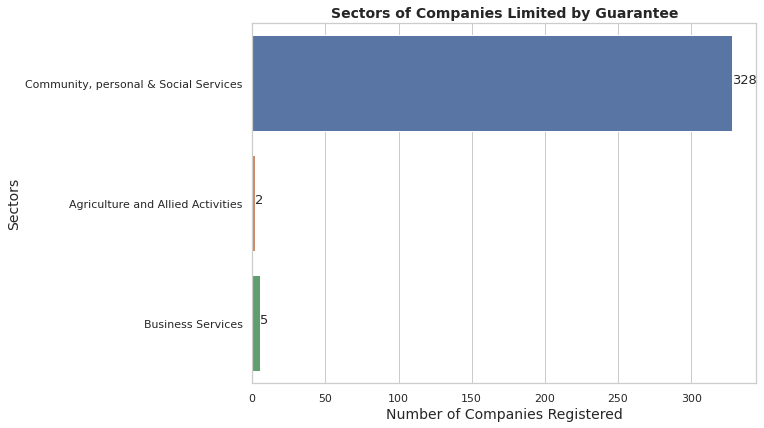

In [76]:
ax=plt.figure(figsize=(7,5)).add_axes([0,0,1,1])
sns.set_style('white')
sns.countplot(y='activity_description',data=data[data['category']=='Company Limited by Guarantee'])
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,
             "%i"% rect.get_width(),fontsize=13 )

plt.title('Sectors of Companies Limited by Guarantee',fontsize=14, weight='bold')
plt.xlabel('Number of Companies Registered',fontsize=14)
plt.ylabel('Sectors',fontsize=14)
plt.show()

In [77]:
Company_Type = data["company_type"].value_counts().keys()
Company_values = data["company_type"].value_counts().tolist()

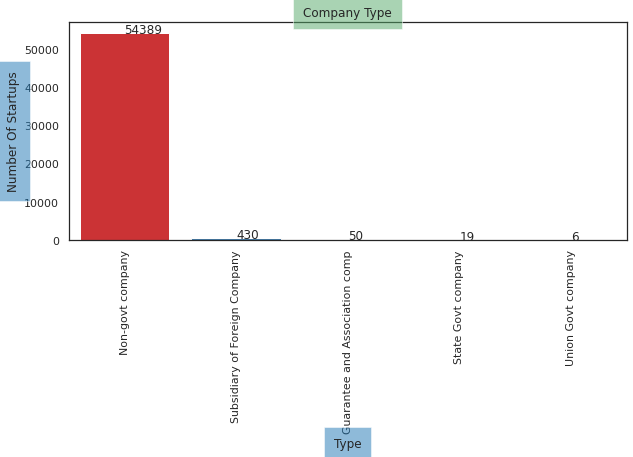

In [78]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=90)
plt.xlabel("Type",bbox={"facecolor":"tab:blue","alpha":0.5,"pad":10})
plt.ylabel("Number Of Startups",bbox={"facecolor":"tab:blue","alpha":0.5,"pad":10})
plt.title("Company Type",bbox={"facecolor":"g","alpha":0.5,"pad":10})


sns.barplot(x=Company_Type,y=Company_values ,palette = "Set1")
for index,value in enumerate(Company_values):
    plt.text(index,value, str(value))

plt.show()

**Column Description**

In [79]:
Type = data["activity_description"].value_counts().keys()
Val = data["activity_description"].value_counts().tolist()

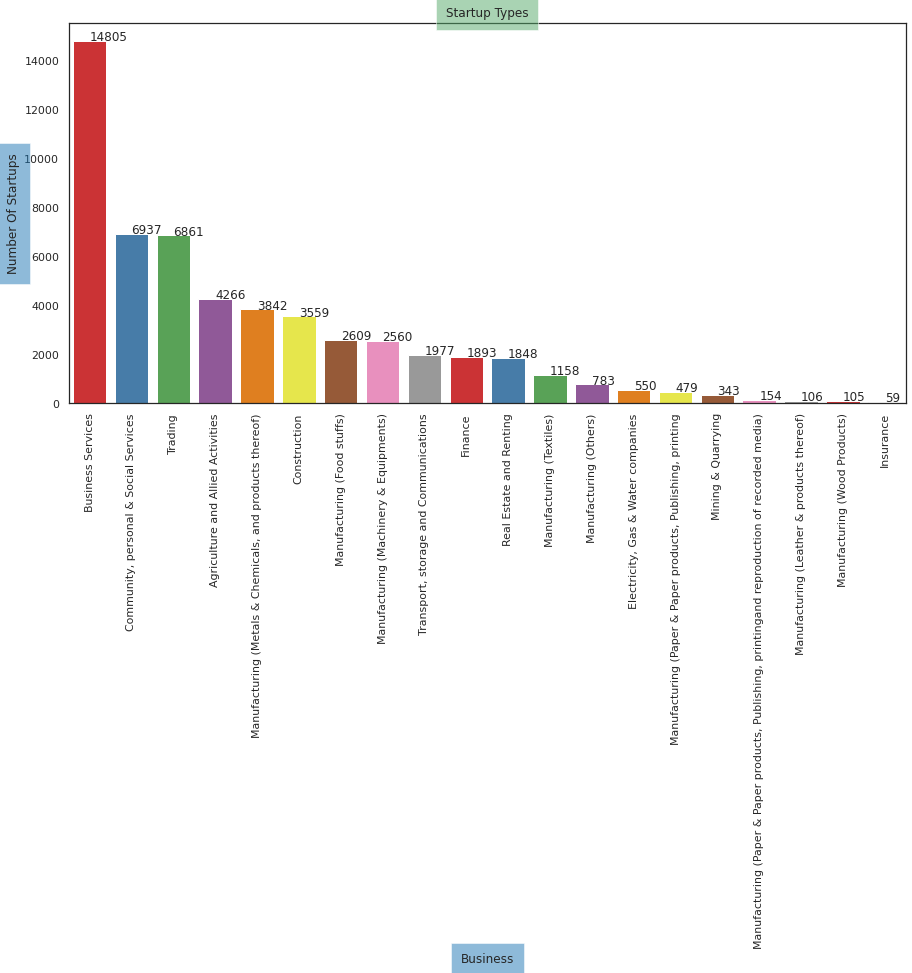

In [80]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
plt.xlabel("Business",bbox={"facecolor":"tab:blue","alpha":0.5,"pad":10})
plt.ylabel("Number Of Startups",bbox={"facecolor":"tab:blue","alpha":0.5,"pad":10})
plt.title("Startup Types",bbox={"facecolor":"g","alpha":0.5,"pad":10})

sns.barplot(x=Type,y=Val ,palette = "Set1")
for index,value in enumerate(Val):
    plt.text(index,value, str(value))

plt.show()

**Categorical distribution**

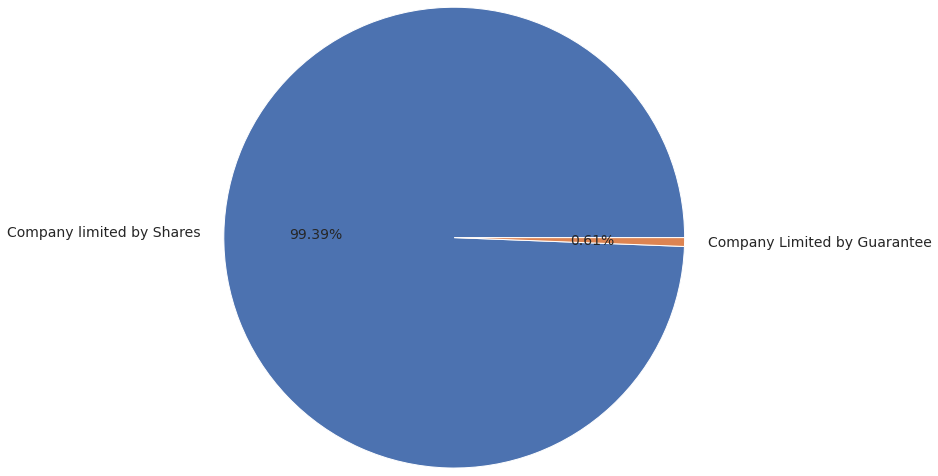

In [81]:
category_dict = dict(data.category.value_counts())

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.pie(x=list(category_dict.values()), 
       labels=list(category_dict.keys()), 
       autopct="%1.2f%%",
       radius=2,
       textprops={'fontsize': 14})
plt.show()

**Class distribution**

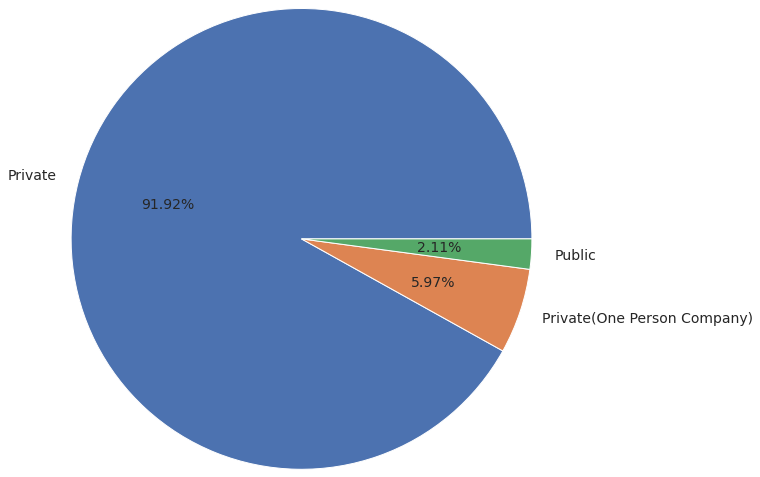

In [82]:
class_dict = dict(data["class"].value_counts())

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.pie(x=list(class_dict.values()), 
       labels=list(class_dict.keys()), 
       autopct="%1.2f%%",
       radius=2,
       textprops={'fontsize': 14})
plt.show()

**Correlation matrix**

In [83]:
c = data.corr()
c

,authorized_capital,paidup_capital
authorized_capital,1.000000,0.832134
paidup_capital,0.832134,1.000000


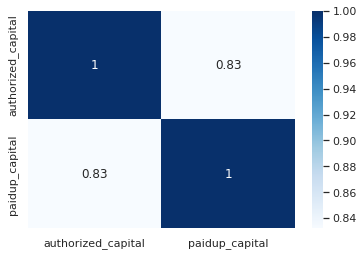

In [84]:
sns.heatmap(c,annot=True,cmap='Blues')
plt.show()

# **Startups profit prediction**




# **Introduction**

To start a company/startup, and you are planning to invest a thousand bucks for that, but in return, you want to make sure whether it’s a good bet.

So you opened google and searched for the cost that the market demands. You get a reasonable estimate of what you should invest. However, as the market is unpredictable, it is challenging to guess the profit you may earn.

Many startups face this, but fret not; this is where we can automate the process using machine learning and get pretty good predictions.

## **About the 50 startups dataset**

  The goal of the project is to predict the profit of startup profit on the bases of data provided which are on the bases of Research and Development Spend(R&D Spend), Administration Spend, Marketing Spend and State. 
  
  We use multiple regression in this model because we have to predict profit(dependent variable) on bases of multiple field(independent variables) rather then one field just like we done in Simple Linear Regression. 
  
  This model can help those people who want to invest in startup company by analysing profit of the company.



**Machine Learning Model Can Help Here :**

This particular dataset holds data from 50 startups in New York, California, and Florida. The features in this dataset are R&D spending, Administration Spending, Marketing Spending, and location features, while the target variable is 
1. R&D spending: The amount which startups are spending on Research and development.
2. Administration spending: The amount which startups are spending on the Admin panel.
3. Marketing spending: The amount which startups are spending on marketing strategies.
4. State: To which state that particular startup belongs.
5. Profit: How much profit that particular startup is making.


***About Data From Dataset***

This particular dataset holds data from 50 startups in New York, California, and Florida. The features in this dataset are R&D spending, Administration Spending, Marketing Spending, and location features, while the target variable is 
1. R&D spending: The amount which startups are spending on Research and development.
2. Administration spending: The amount which startups are spending on the Admin panel.
3. Marketing spending: The amount which startups are spending on marketing strategies.
4. State: To which state that particular startup belongs.
5. Profit: How much profit that particular startup is making.

**Multiple linear regression** - Multiple linear regression there is more than one independent variable.

***Importing the dataset***

In [85]:
dataset = pd.read_csv("/content/drive/MyDrive/Analysing Startups and Profit Prediction - Capstone Project​/50_Startups.csv")

***Analyzing the data***

In [86]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [87]:
dataset.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


**Numerical/Statistical analysis of the dataset**

In [88]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


***Dimensions of dataset***

In [89]:
print('There are ',dataset.shape[0],'rows and ',dataset.shape[1],'columns in the dataset.')

There are  50 rows and  5 columns in the dataset.


***To check if there are repeated values in the dataset or not***

In [90]:
print('There are',dataset.duplicated().sum(),'duplicate values in the dateset.')

There are 0 duplicate values in the dateset.


***Check for NULL values***

In [91]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

***Schema of dataset***

In [92]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


**corr function**

In [93]:
c = dataset.corr()
c

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


**Correlation matrix**

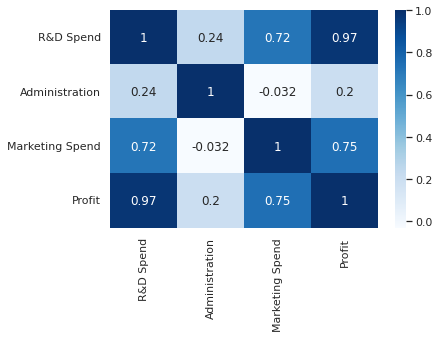

In [94]:
sns.heatmap(c,annot=True,cmap='Blues')
plt.show()

**Outliers detection in the target variable**

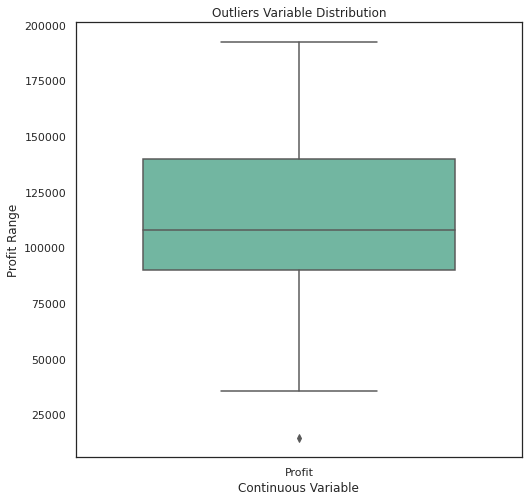

In [95]:
outliers = ['Profit']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=dataset[outliers], orient="v", palette="Set2" , width=0.7) # orient = "v" : vertical boxplot , 
                                                                            # orient = "h" : hotrizontal boxplot
plt.title("Outliers Variable Distribution")
plt.ylabel("Profit Range")
plt.xlabel("Continuous Variable")

plt.show()

**State-wise outliers detection**

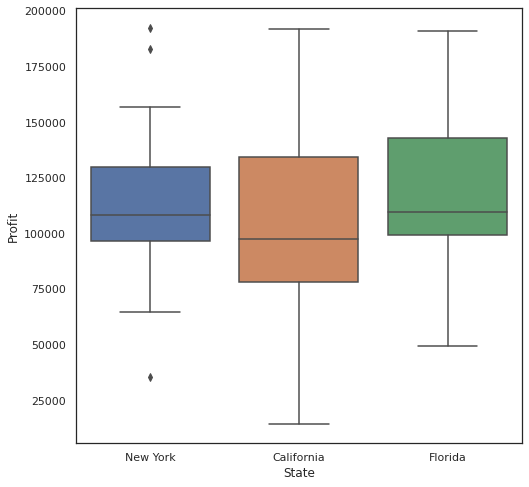

In [96]:
sns.boxplot(x = 'State', y = 'Profit', data = dataset)
plt.show()

**Histogram on Profit**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


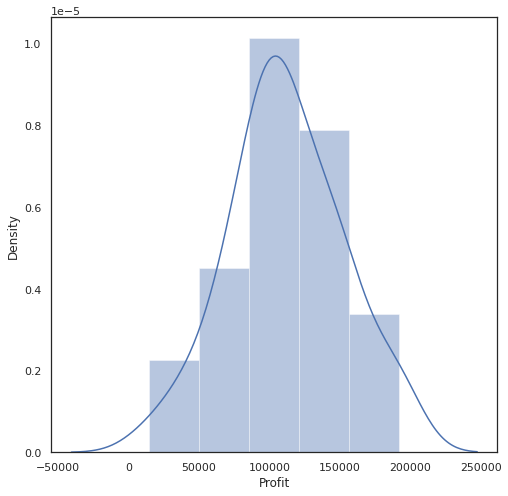

In [97]:
sns.distplot(dataset['Profit'],bins=5,kde=True)
plt.show()

**Pair plot**

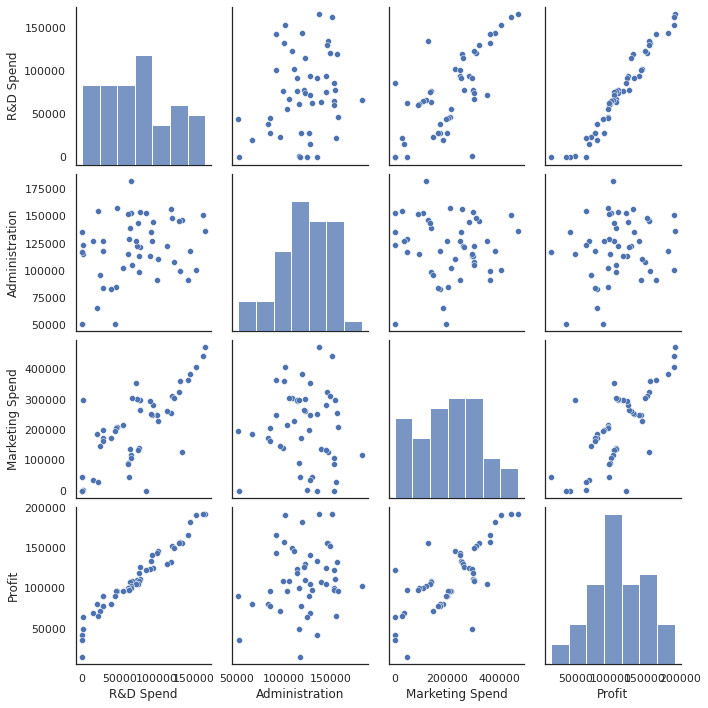

In [98]:
sns.pairplot(dataset)
plt.show()

**Model Development**

In [99]:
# spliting Dataset in Dependent & Independent Variables
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

***Label Encoder***

In [100]:
from sklearn.preprocessing import LabelEncoder

***Encode labels with values between 0 and n_classes-1***

In [101]:
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
X1 = pd.DataFrame(X)
X1.head()

,0,1,2,3
0,165349.2,136897.8,471784.1,2
1,162597.7,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


**To split the data into training and testing data**

In [102]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=0)
x_train

array([[130298.13, 145530.06, 323876.68, 1],
       [119943.24, 156547.42, 256512.92, 1],
       [1000.23, 124153.04, 1903.93, 2],
       [542.05, 51743.15, 0.0, 2],
       [65605.48, 153032.06, 107138.38, 2],
       [114523.61, 122616.84, 261776.23, 2],
       [61994.48, 115641.28, 91131.24, 1],
       [63408.86, 129219.61, 46085.25, 0],
       [78013.11, 121597.55, 264346.06, 0],
       [23640.93, 96189.63, 148001.11, 0],
       [76253.86, 113867.3, 298664.47, 0],
       [15505.73, 127382.3, 35534.17, 2],
       [120542.52, 148718.95, 311613.29, 2],
       [91992.39, 135495.07, 252664.93, 0],
       [64664.71, 139553.16, 137962.62, 0],
       [131876.9, 99814.71, 362861.36, 2],
       [94657.16, 145077.58, 282574.31, 2],
       [28754.33, 118546.05, 172795.67, 0],
       [0.0, 116983.8, 45173.06, 0],
       [162597.7, 151377.59, 443898.53, 0],
       [93863.75, 127320.38, 249839.44, 1],
       [44069.95, 51283.14, 197029.42, 0],
       [77044.01, 99281.34, 140574.81, 2],
       [1346

# **Selecting Model Architecture & Training**

# **MODEL 1 - LINEAR REGRESSION**

As per EDA done earlier, our data forms a Gaussian distribution, which is linearly separable. Hence, a straightforward technique called linear regression is appropriate here.

In [103]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)
print('Model has been trained successfully')

Model has been trained successfully


**Testing the model using the predict function**

model is ready, let’s now check the prediction.

In [104]:
y_pred = model.predict(x_test)
y_pred

array([104055.1842384 , 132557.60289702, 133633.01284474,  72336.28081054,
       179658.27210893, 114689.63133397,  66514.82249033,  98461.69321326,
       114294.70487032, 169090.51127461,  96281.907934  ,  88108.30057881,
       110687.1172322 ,  90536.34203081, 127785.3793861 ])

**Testing scores**

In [105]:
testing_data_model_score = model.score(x_test, y_test)
print("Model Score/Performance on Testing data",testing_data_model_score)

Model Score/Performance on Testing data 0.9355139722149947


In [106]:
training_data_model_score = model.score(x_train, y_train)
print("Model Score/Performance on Training data",training_data_model_score)

Model Score/Performance on Training data 0.9515496105627431


**Comparing the predicted values and actual values**

In [107]:
df = pd.DataFrame(data={'Predicted value':y_pred.flatten(),'Actual Value':y_test.flatten()})
df

,Predicted value,Actual Value
0,104055.184238,103282.38
1,132557.602897,144259.40
2,133633.012845,146121.95
3,72336.280811,77798.83
4,179658.272109,191050.39
5,114689.631334,105008.31
6,66514.822490,81229.06
7,98461.693213,97483.56
8,114294.704870,110352.25
9,169090.511275,166187.94


**Model evaluation**

To use evaluation metrics such as R², MSE, RMSE, and MAE

● MAE- Mean Absolute Error similar to the above two but uses absolute value and does not penalize significant errors.

● MSE — Mean Squared Error is a statistical measure that captures the error rate of the regression line fit. It penalizes the high errors but results in square units.

● RMSE — Square root of MSE to ensure the same measurement units for better interoperability. (I consider it as best!)

● R²- The person correlation coefficient, a statistical measure that describes the strength of association between 2 numerical variables (here prediction and actual values)

***R2 score – R squared score. It is one of the statistical approaches by which we can find the variance or the spread of the target and feature data.***

In [125]:
from sklearn.metrics import r2_score

r2Score = r2_score(y_pred, y_test)
print("R2 score of model is :" ,r2Score*100)

R2 score of model is : 93.39448007716635


Pretty close to 1 — means positive linear relationship, or simple words good line fit(good model performance!)

***MSE – Mean Squared Error. By using this approach we can find that how much the regression best fit line is close to all the residual.***

In [126]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_pred, y_test)
print("Mean Squarred Error is :" ,mse*100)

Mean Squarred Error is : 6224496238.946446


The MSE is expected to have more significant errors values than MAE as we squared the mistakes.

***RMSE – Root Mean Squared Error. This is similar to the Mean squared error(MSE) approach, the only difference is that here we find the root of the mean squared error***

In [127]:
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print("Root Mean Squarred Error is : ",rmse*100)

Root Mean Squarred Error is :  788954.7666974607


Intuitively, the values returned by RMSE are smaller than the MSE. Also, the error takes tremendous matters and is challenging to interpret, so we require our last measure to produce a single value.

***MAE – Mean Absolute Error. By using this approach we can find the difference between the actual values and predicted values but that difference is absolute i.e. the difference is positive.***

In [128]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_pred,y_test)
print("Mean Absolute Error is :" ,mae)

Mean Absolute Error is : 6503.577323580028


The score of 6503 is due to the deviation errors as expected.

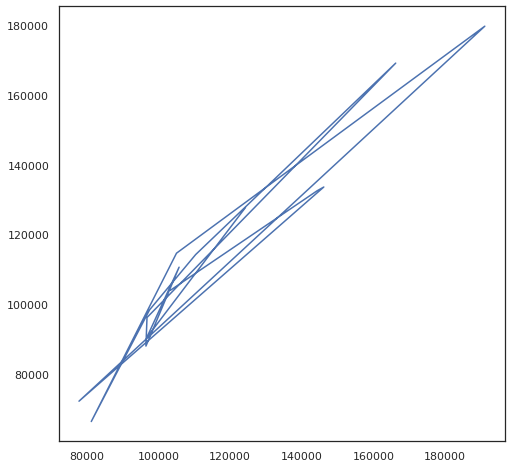

In [129]:
plt.plot(y_test, y_pred)
plt.show()

# **Model 2 - Random Forest Regressor**

In [130]:
data = pd.read_csv('/content/drive/MyDrive/Analysing Startups and Profit Prediction - Capstone Project​/50_Startups.csv')

In [131]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor


**To split the data into training and testing data**

In [132]:
a_train,a_test,b_train,b_test = train_test_split(X,y,train_size=0.7,random_state=0)
a_train

array([[130298.13, 145530.06, 323876.68, 1],
       [119943.24, 156547.42, 256512.92, 1],
       [1000.23, 124153.04, 1903.93, 2],
       [542.05, 51743.15, 0.0, 2],
       [65605.48, 153032.06, 107138.38, 2],
       [114523.61, 122616.84, 261776.23, 2],
       [61994.48, 115641.28, 91131.24, 1],
       [63408.86, 129219.61, 46085.25, 0],
       [78013.11, 121597.55, 264346.06, 0],
       [23640.93, 96189.63, 148001.11, 0],
       [76253.86, 113867.3, 298664.47, 0],
       [15505.73, 127382.3, 35534.17, 2],
       [120542.52, 148718.95, 311613.29, 2],
       [91992.39, 135495.07, 252664.93, 0],
       [64664.71, 139553.16, 137962.62, 0],
       [131876.9, 99814.71, 362861.36, 2],
       [94657.16, 145077.58, 282574.31, 2],
       [28754.33, 118546.05, 172795.67, 0],
       [0.0, 116983.8, 45173.06, 0],
       [162597.7, 151377.59, 443898.53, 0],
       [93863.75, 127320.38, 249839.44, 1],
       [44069.95, 51283.14, 197029.42, 0],
       [77044.01, 99281.34, 140574.81, 2],
       [1346

In [133]:
model = RandomForestRegressor()
model.fit(a_train,b_train)

print('Model has been trained successfully')

Model has been trained successfully


**Testing the model using the predict function**

In [134]:
b_pred = model.predict(a_test)
b_pred

array([103060.5946, 136241.4286, 136598.0438,  80126.1285, 182057.3145,
       117718.5035,  69456.2638, 100218.4002, 116239.3504, 167800.7641,
       101544.4193,  89652.8638, 116592.6247,  91132.9223, 129891.1264])

**Testing scores**

In [135]:
testing_data_model_score = model.score(a_test, b_test)
print("Model Score/Performance on Testing data",testing_data_model_score)

Model Score/Performance on Testing data 0.9422448798979942


In [136]:
training_data_model_score = model.score(a_train, b_train)
print("Model Score/Performance on Training data",training_data_model_score)

Model Score/Performance on Training data 0.9869705497453721


**Comparing the predicted values and actual values**

In [137]:
df = pd.DataFrame(data={'Predicted value':b_pred.flatten(),'Actual Value':b_test.flatten()})
df

,Predicted value,Actual Value
0,103060.5946,103282.38
1,136241.4286,144259.40
2,136598.0438,146121.95
3,80126.1285,77798.83
4,182057.3145,191050.39
5,117718.5035,105008.31
6,69456.2638,81229.06
7,100218.4002,97483.56
8,116239.3504,110352.25
9,167800.7641,166187.94


**Model evaluation**

***R2 score – R squared score. It is one of the statistical approaches by which we can find the variance or the spread of the target and feature data.***

In [138]:
from sklearn.metrics import r2_score

r2Score = r2_score(b_pred, b_test)
print("R2 score of model is :" ,r2Score*100)

R2 score of model is : 93.7911879942046


Pretty close to 1 — means positive linear relationship, or simple words good line fit(good model performance!)

***MSE – Mean Squared Error. By using this approach we can find that how much the regression best fit line is close to all the residual.***

In [122]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(b_pred, b_test)
print("Mean Squarred Error is :" ,mse*100)

Mean Squarred Error is : 5484904122.819944


The MSE is expected to have more significant errors values than MAE as we squared the mistakes.

***RMSE – Root Mean Squared Error. This is similar to the Mean squared error(MSE) approach, the only difference is that here we find the root of the mean squared error***

In [123]:
rmse = np.sqrt(mean_squared_error(b_pred, b_test))
print("Root Mean Squarred Error is : ",rmse*100)

Root Mean Squarred Error is :  740601.3855523054


Intuitively, the values returned by RMSE are smaller than the MSE. Also, the error takes tremendous matters and is challenging to interpret, so we require our last measure to produce a single value.

***MAE – Mean Absolute Error. By using this approach we can find the difference between the actual values and predicted values but that difference is absolute i.e. the difference is positive.***

In [124]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(b_pred,b_test)
print("Mean Absolute Error is :" ,mae)

Mean Absolute Error is : 6482.674853333328


The score of 6856 is due to the deviation errors as expected

**MODEL PERFORMANCE**

  By Analysing the Random Forest Regressor and Linear Regression performance the Random Forest Regressor algorithms are gave more prediction accuracy than Linear Regression. 
  
  So we can choose Linear Regression for predicitions.

This concludes our project on a step-by-step approach for analysing and developing a model.